# Regime detection using classical methods
* Kmeans clustering 2d and 3d using euclidean/ manhatan / cosine distance or dtw
* PCA and TSNE
* SOM (Self Organised Maps)
* Kernel kmeans

Check for Range, Fear and Greed Index, RSI and their % changes. Also check for different time frames since data is non stationary and their statistical properties change over time

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
ticker = 'BTC-USD'
start = '2018-02-01'
end = '2025-03-10'
raw_data = yf.download(ticker, start, end)
data = raw_data[['Close', 'High', 'Low']]
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price             Close          High          Low
Ticker          BTC-USD       BTC-USD      BTC-USD
Date                                              
2018-02-01  9170.540039  10288.799805  8812.280273
2018-02-02  8830.750000   9142.280273  7796.490234
2018-02-03  9174.910156   9430.750000  8251.629883
2018-02-04  8277.009766   9334.870117  8031.220215
2018-02-05  6955.270020   8364.839844  6756.680176

In [3]:
df = data.copy()

In [4]:
import requests

r = requests.get('https://api.alternative.me/fng/?limit=0&date_format=cn')
data = r.json()['data']
fg = pd.DataFrame(data)
fg.set_index("timestamp", inplace=True)
fg.index = pd.to_datetime(fg.index)
fg.tail()

value value_classification time_until_update
timestamp                                              
2018-02-05    11         Extreme Fear               NaN
2018-02-04    24         Extreme Fear               NaN
2018-02-03    40                 Fear               NaN
2018-02-02    15         Extreme Fear               NaN
2018-02-01    30                 Fear               NaN

In [5]:
fg["value"] = pd.to_numeric(fg["value"], errors="coerce").astype("Int64")
df["fg"] = fg["value"].reindex(df.index)
df.tail()

Price              Close          High           Low  fg
Ticker           BTC-USD       BTC-USD       BTC-USD    
Date                                                    
2025-03-05  90623.562500  90998.242188  86379.773438  20
2025-03-06  89961.726562  92804.937500  87852.140625  25
2025-03-07  86742.671875  91191.046875  84717.679688  34
2025-03-08  86154.593750  86847.265625  85247.484375  28
2025-03-09  80601.039062  86471.132812  80052.484375  27

In [6]:
import pandas_ta as ta

# Assuming df is your DataFrame with a 'Close' column
df["RSI"] = ta.rsi(df["Close"]["BTC-USD"], length=14)

In [7]:
df["Log_Returns"] = np.log(df["Close"] / df["Close"].shift(1))
df["Range"] = (df["High"] / df["Low"]) - 1
df["pct_Range"] = df["Range"] / df["Range"].shift(1) -1
df["pct_fg"] = df["fg"] / df["fg"].shift(1) -1
df["pct_RSI"] = df["RSI"] / df["RSI"].shift(1) -1
df.dropna(inplace=True)
df.tail()

Price              Close          High           Low  fg        RSI  \
Ticker           BTC-USD       BTC-USD       BTC-USD                  
Date                                                                  
2025-03-05  90623.562500  90998.242188  86379.773438  20  46.987426   
2025-03-06  89961.726562  92804.937500  87852.140625  25  46.028299   
2025-03-07  86742.671875  91191.046875  84717.679688  34  41.582334   
2025-03-08  86154.593750  86847.265625  85247.484375  28  40.806863   
2025-03-09  80601.039062  86471.132812  80052.484375  27  34.301259   

Price      Log_Returns     Range pct_Range    pct_fg   pct_RSI  
Ticker                                                          
Date                                                            
2025-03-05    0.038255  0.053467 -0.409495  0.333333  0.142311  
2025-03-06   -0.007330  0.056377  0.054417      0.25 -0.020412  
2025-03-07   -0.036438  0.076411  0.355370      0.36 -0.096592  
2025-03-08   -0.006803  0.018766 -0.754403 -0.176471 -0.018649  
2025-03-09   -0.066632  0.080181  3.272575 -0.035714 -0.159424

In [8]:
cluster_col = ["Range","Log_Returns", "pct_Range", "pct_fg", "pct_RSI"]
size = int(len(df) * 0.8)
X_train_2 = df[cluster_col].iloc[:size,:]
X_test_2 = df[cluster_col].iloc[:size,:]

In [9]:
X_train_2

Price          Range Log_Returns pct_Range    pct_fg   pct_RSI
Ticker                                                        
Date                                                          
2018-02-16  0.050818    0.006618 -0.431059 -0.056338  0.007788
2018-02-17  0.097553    0.082383  0.919639  0.104478  0.089949
2018-02-18  0.099148   -0.051792  0.016353 -0.148649 -0.098255
2018-02-19  0.072347    0.061874 -0.270310  0.063492  0.067048
2018-02-20  0.064700    0.015768 -0.105697  0.104478  0.015408
...              ...         ...       ...       ...       ...
2023-10-05  0.026164   -0.013891  0.232254 -0.020408 -0.092148
2023-10-06  0.038103    0.019172  0.456291  0.041667  0.092898
2023-10-07  0.005657    0.000796 -0.851528     -0.02  0.003355
2023-10-08  0.013032   -0.001207  1.303568  0.020408 -0.008780
2023-10-09  0.025159   -0.012659  0.930609       0.0 -0.089627

[2058 rows x 5 columns]

In [10]:
import itertools


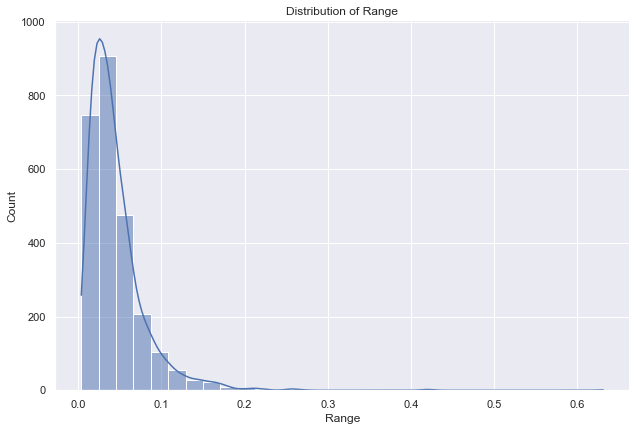

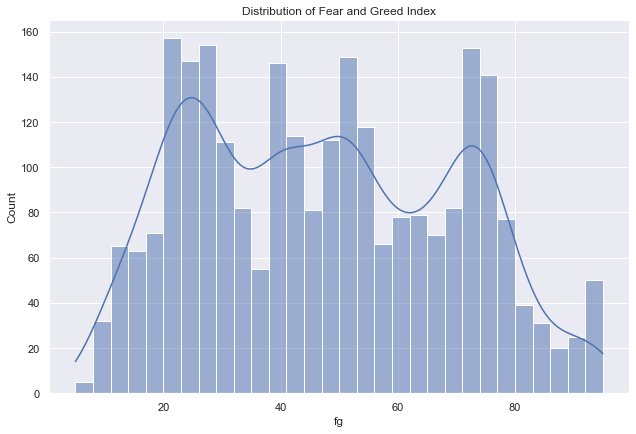

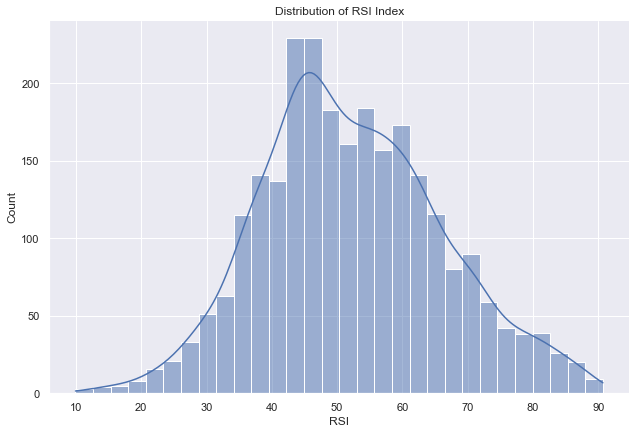

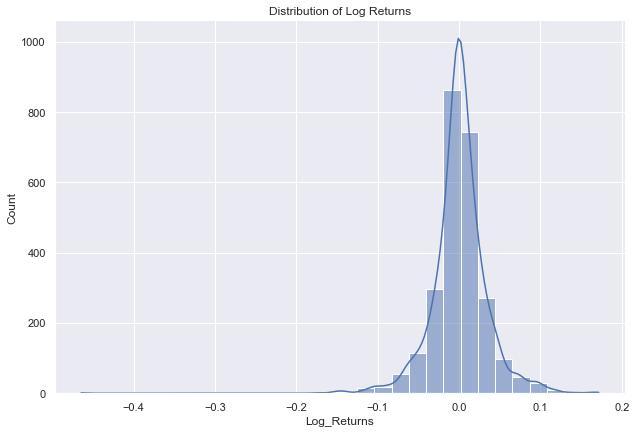

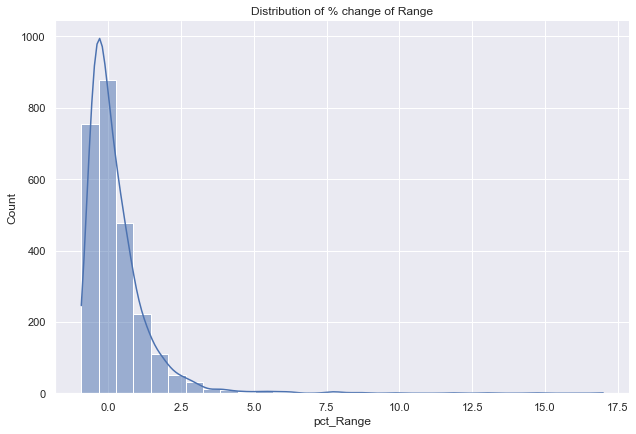

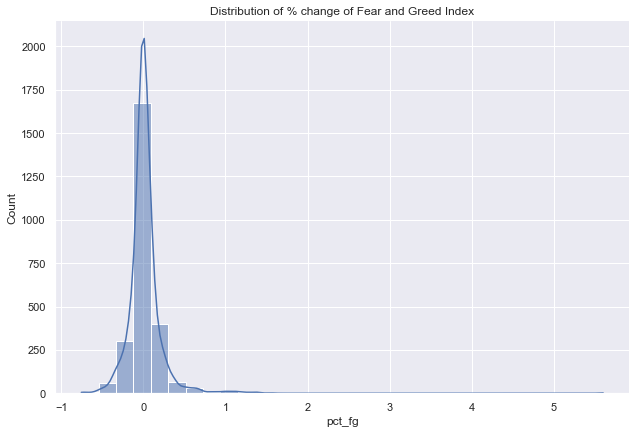

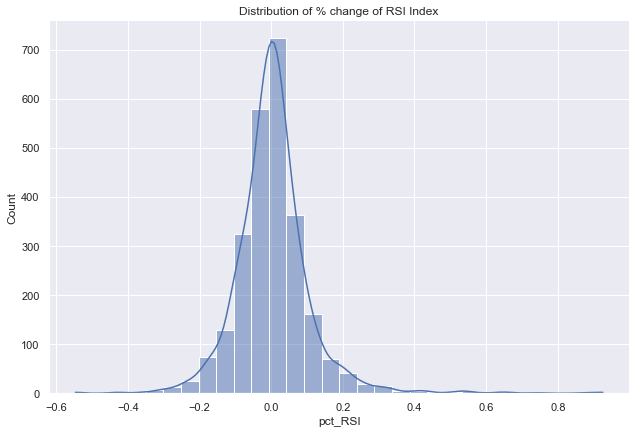

In [11]:
# Plot for Returns using displot
sns.displot(df["Range"], kind="hist", bins=30, kde=True, height=6, aspect=1.5)
plt.title("Distribution of Range")
plt.show()

sns.displot(df["fg"], kind="hist", bins=30, kde=True, height=6, aspect=1.5)
plt.title("Distribution of Fear and Greed Index")
plt.show()

sns.displot(df["RSI"], kind="hist", bins=30, kde=True, height=6, aspect=1.5)
plt.title("Distribution of RSI Index")
plt.show()

sns.displot(df["Log_Returns"], kind="hist", bins=30, kde=True, height=6, aspect=1.5)
plt.title("Distribution of Log Returns")
plt.show()

sns.displot(df["pct_Range"], kind="hist", bins=30, kde=True, height=6, aspect=1.5)
plt.title("Distribution of % change of Range")
plt.show()

sns.displot(df["pct_fg"], kind="hist", bins=30, kde=True, height=6, aspect=1.5)
plt.title("Distribution of % change of Fear and Greed Index")
plt.show()

sns.displot(df["pct_RSI"], kind="hist", bins=30, kde=True, height=6, aspect=1.5)
plt.title("Distribution of % change of RSI Index")
plt.show()

In [12]:
col_list = ["Range", "fg", "RSI", "Log_Returns", "pct_Range", "pct_fg", "pct_RSI"]
size = int(len(df) * 0.8)
X_train = df[col_list].iloc[:size,:]
X_test = df[col_list].iloc[:size,:]
train_price = df['Close'].iloc[:size,:]
test_price = df['Close'].iloc[size:,:]

In [13]:
import itertools

def plot_scatter_combinations(df, columns):
    """
    Generates 2D scatter plots for all possible column pairs from the given list.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        columns (list of str): List of column names to use for scatter plots.
    
    Returns:
        None (Displays plots)
    """
    # Get all possible 2D combinations of the selected columns
    column_pairs = list(itertools.combinations(columns, 2))

    # Set up the layout
    num_plots = len(column_pairs)
    rows = (num_plots // 3) + (num_plots % 3 > 0)  # Arrange in a grid
    fig, axes = plt.subplots(rows, min(3, num_plots), figsize=(15, 5 * rows))

    if num_plots == 1:
        axes = [axes]  # Ensure we can iterate when there's only one plot
    elif rows == 1:
        axes = axes.flatten()  # Convert to 1D array if there's only one row
    else:
        axes = axes.ravel()  # Flatten grid to 1D array

    # Plot each pair
    for i, (x_col, y_col) in enumerate(column_pairs):
        sns.scatterplot(x=df[x_col], y=df[y_col], ax=axes[i])
        axes[i].set_title(f"{x_col} vs {y_col}")
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)

    # Remove empty subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter_combinations(df, columns):
    """
    Generates 3D scatter plots for all possible column triplets from the given list.

    Parameters:
        df (pd.DataFrame): The input dataframe.
        columns (list of str): List of column names to use for scatter plots.

    Returns:
        None (Displays plots)
    """
    # Get all possible 3D combinations of the selected columns
    column_triplets = list(itertools.combinations(columns, 3))

    # Set up the layout
    num_plots = len(column_triplets)
    rows = (num_plots // 2) + (num_plots % 2 > 0)  # Arrange in a grid
    fig = plt.figure(figsize=(12, 6 * rows))

    # Plot each triplet in a 3D scatter plot
    for i, (x_col, y_col, z_col) in enumerate(column_triplets):
        ax = fig.add_subplot(rows, 2, i + 1, projection='3d')
        ax.scatter(df[x_col], df[y_col], df[z_col], alpha=0.7, edgecolors='k')
        
        ax.set_title(f"{x_col} vs {y_col} vs {z_col}")
        ax.set_xlabel(x_col)
        ax.set_ylabel(y_col)
        ax.set_zlabel(z_col)

    plt.tight_layout()
    plt.show()

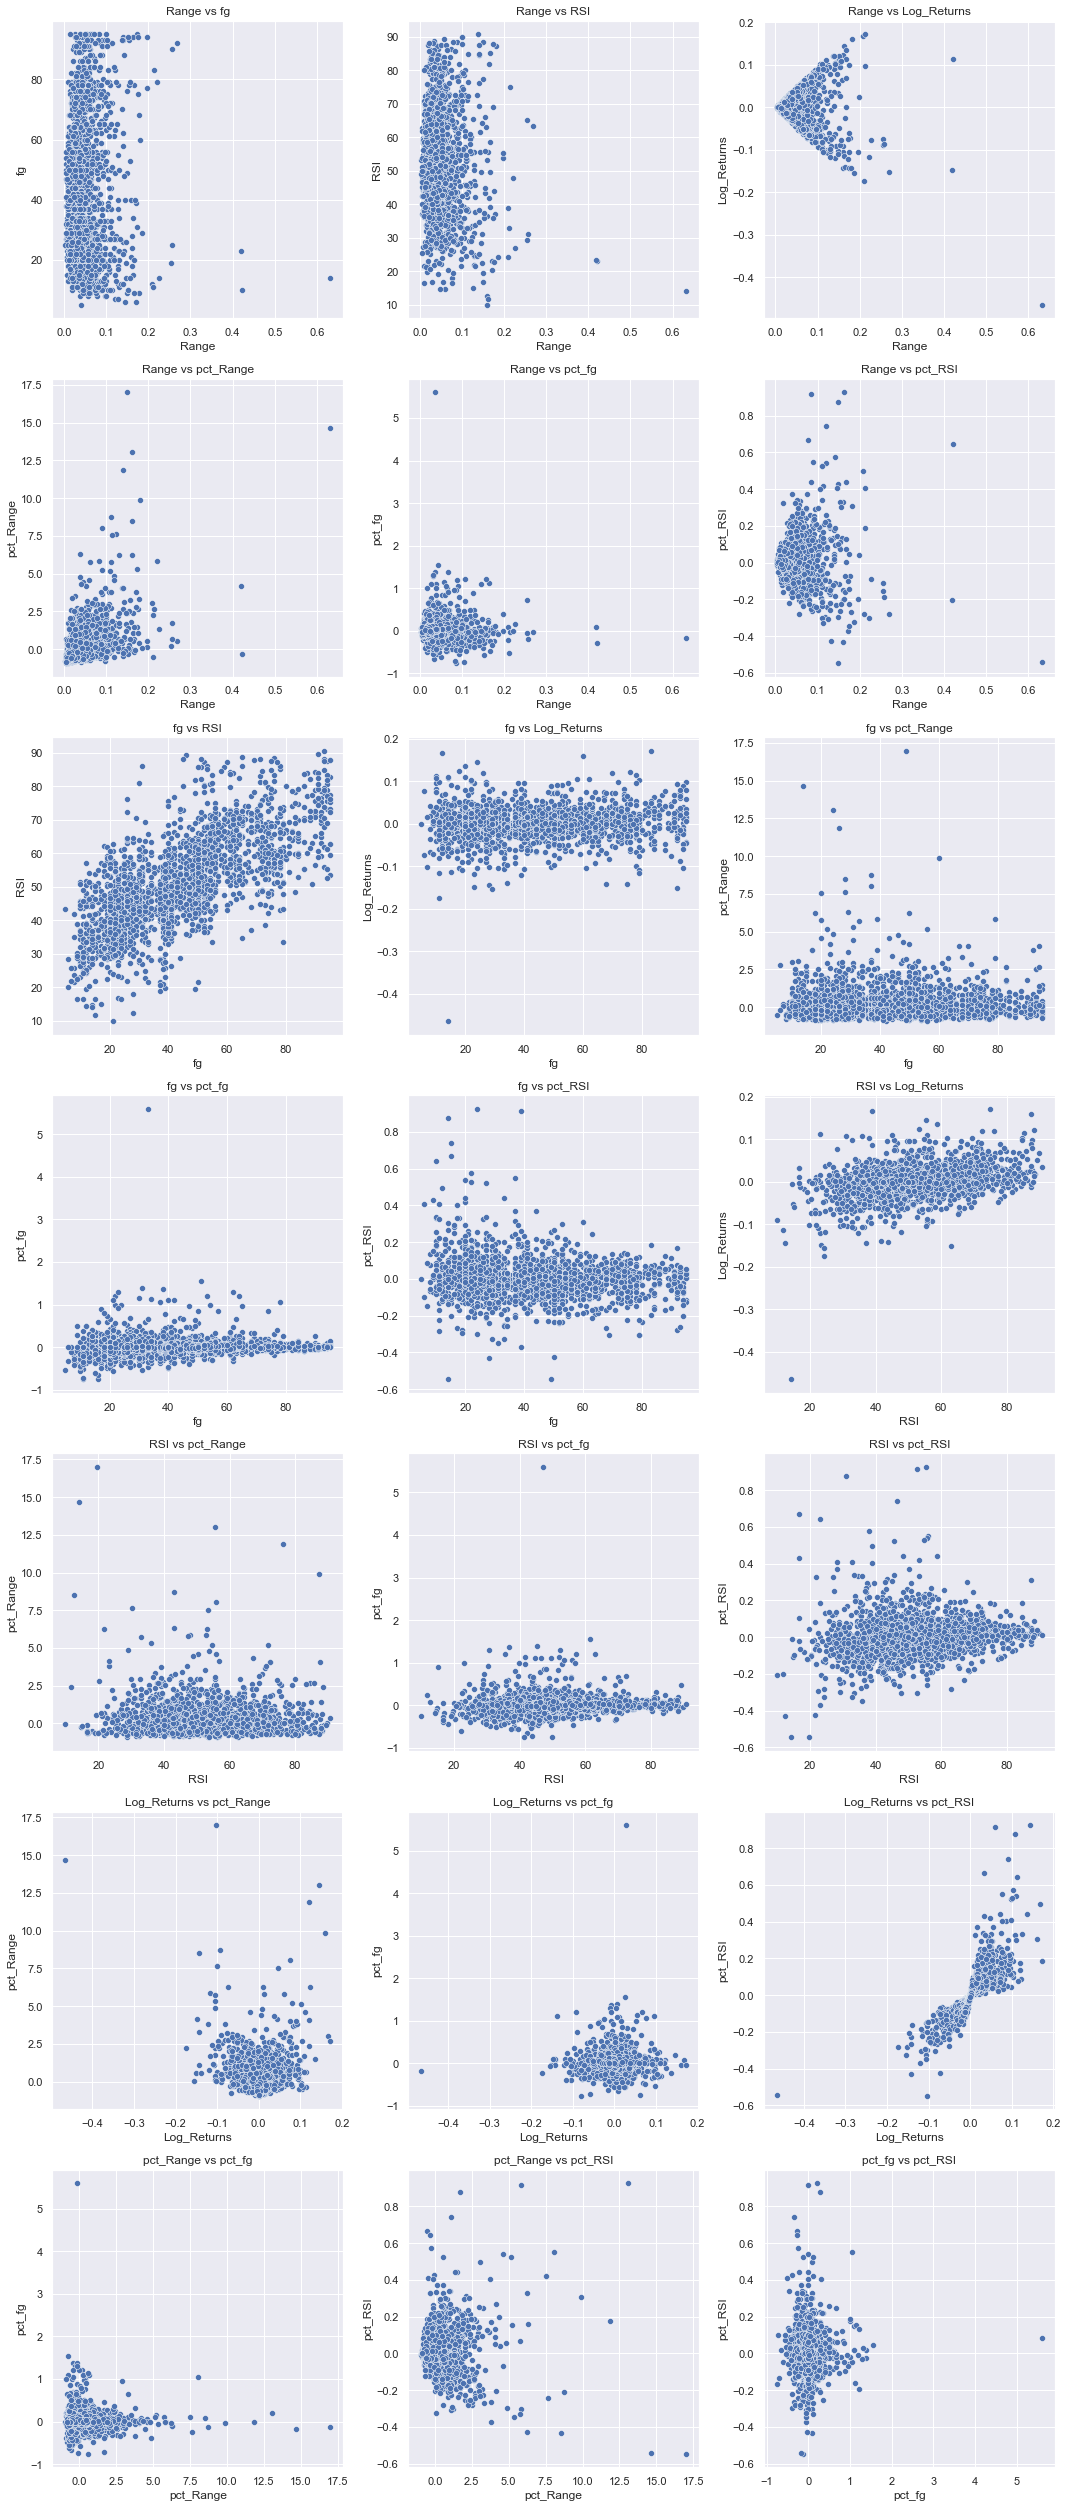

In [14]:
plot_scatter_combinations(X_train, col_list)

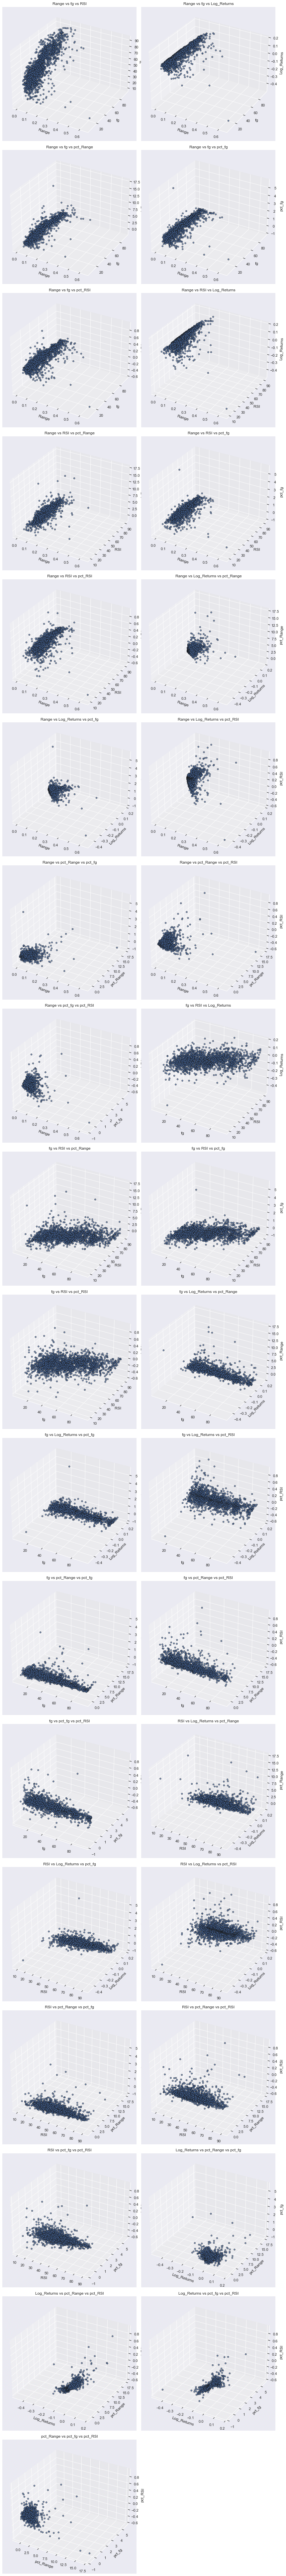

In [15]:
plot_3d_scatter_combinations(X_train, col_list)

In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score

def cluster_kmeans_combinations(X_train_2, max_clusters=10):
    """
    Performs K-Means clustering on different column combinations of the dataset 
    using both StandardScaler and RobustScaler.

    Steps:
    1. Normalizes the data using StandardScaler and RobustScaler.
    2. Uses the elbow method to determine the optimal number of clusters.
    3. Trains K-Means models for every possible feature combination.
    4. Stores results for further analysis.

    Parameters:
        X_train_2 (pd.DataFrame): The input dataframe with features.
        max_clusters (int): The maximum number of clusters to test for the elbow method.

    Returns:
        results (dict): A dictionary containing clustering results.
    """
    results = {}
    scalers = {
        "StandardScaler": StandardScaler(),
        "RobustScaler": RobustScaler()
    }

    # Get all column combinations
    columns = X_train_2.columns
    column_combinations = []
    for r in range(1, len(columns) + 1):  # 1 to len(columns)
        column_combinations.extend(itertools.combinations(columns, r))
    
    # --- Step 1: Determine Optimal Clusters using the Elbow Method ---
    inertia_values = []
    cluster_range = range(1, max_clusters + 1)

    X_scaled = StandardScaler().fit_transform(X_train_2)  # Default scaling
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X_scaled)
        inertia_values.append(kmeans.inertia_)

    # Plot Elbow Method
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia_values, marker='o', linestyle='--')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.title("Elbow Method for Optimal k")
    plt.show()

    # Let user decide the optimal number of clusters
    optimal_k = int(input("Enter the optimal number of clusters based on the plot: "))

    # --- Step 2: Train K-Means Models ---
    for scaler_name, scaler in scalers.items():
        for combination in column_combinations:
            selected_features = list(combination)
            X_selected = X_train_2[selected_features]

            # Scale data
            X_scaled = scaler.fit_transform(X_selected)

            # Train K-Means
            kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
            labels = kmeans.fit_predict(X_scaled)

            # Store results
            key = f"{scaler_name} - {selected_features}"
            results[key] = {
                "kmeans_model": kmeans,
                "labels": labels,
                "silhouette_score": silhouette_score(X_scaled, labels),
                "centroids": kmeans.cluster_centers_
            }

            # Scatter Plot for 2D feature combinations
            if len(selected_features) == 2:
                plt.figure(figsize=(6, 5))
                plt.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], c=labels, cmap='viridis', alpha=0.7)
                plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red', label='Centroids')
                plt.xlabel(selected_features[0])
                plt.ylabel(selected_features[1])
                plt.title(f"K-Means Clustering ({scaler_name}) - {selected_features}")
                plt.legend()
                plt.show()

    return results


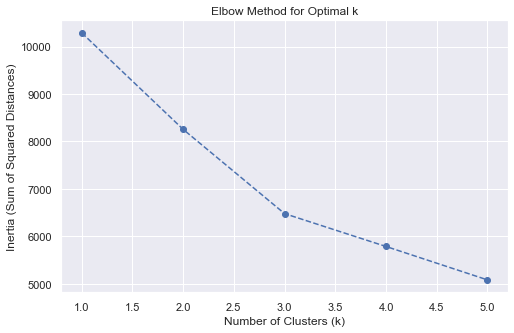

Enter the optimal number of clusters based on the plot: 3


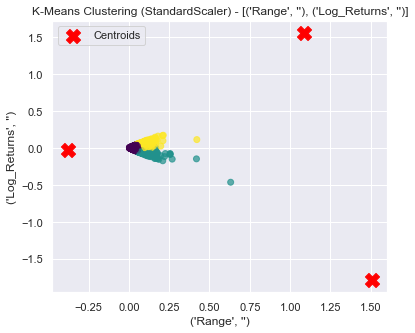

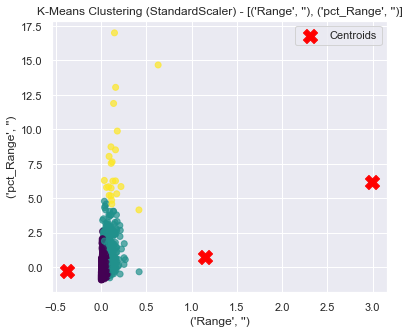

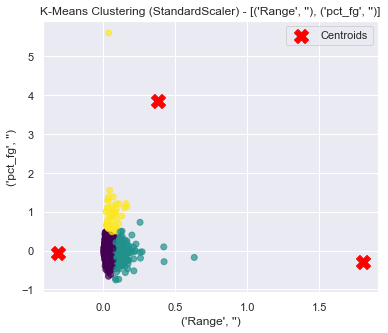

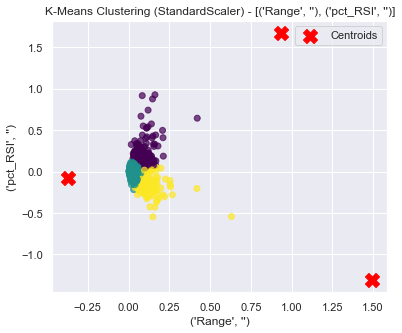

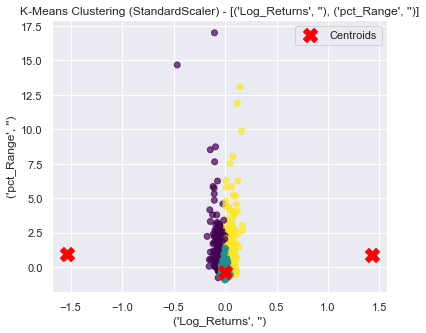

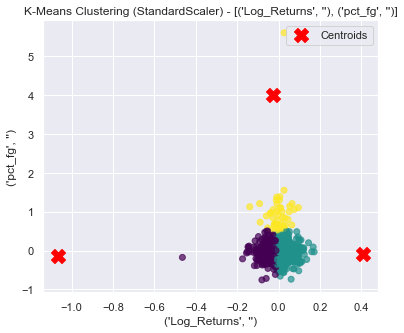

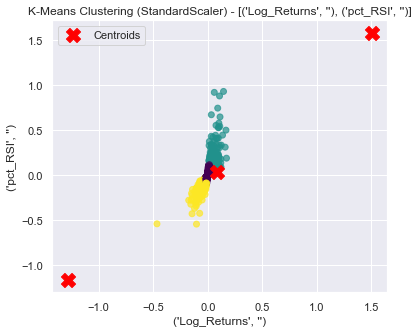

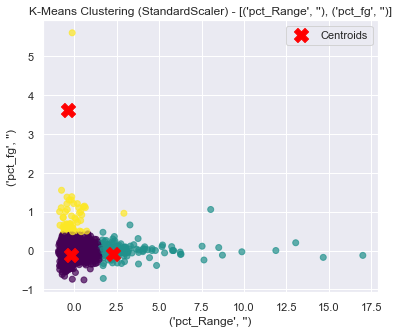

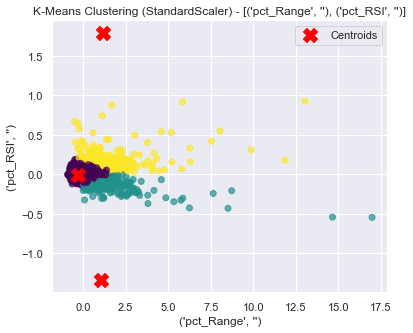

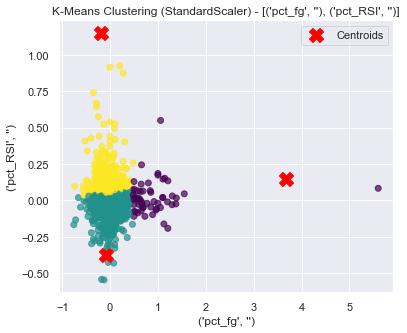

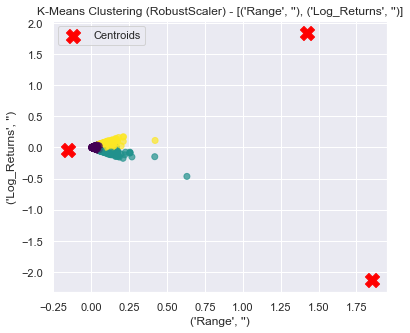

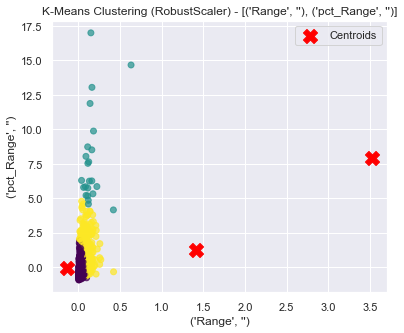

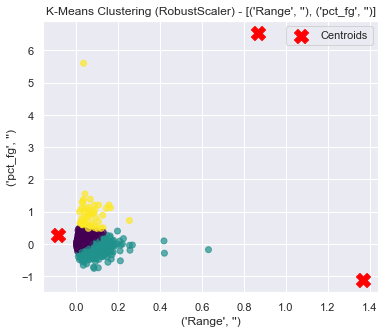

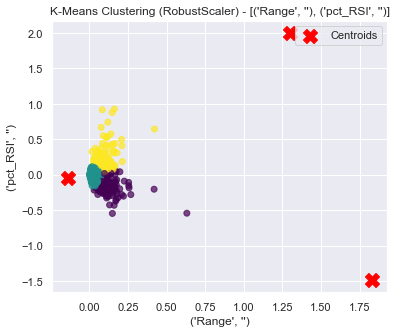

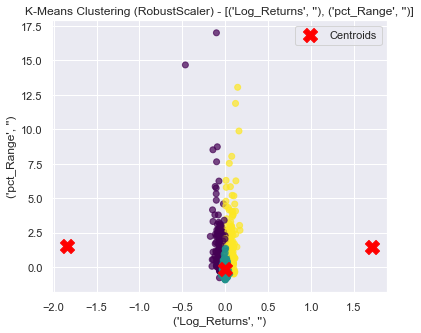

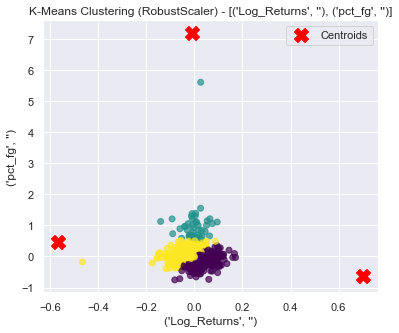

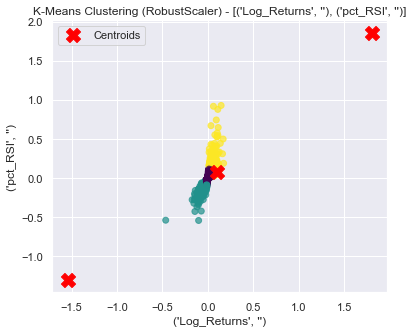

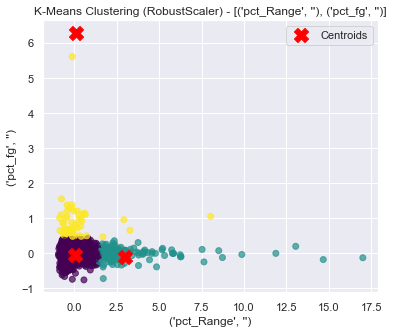

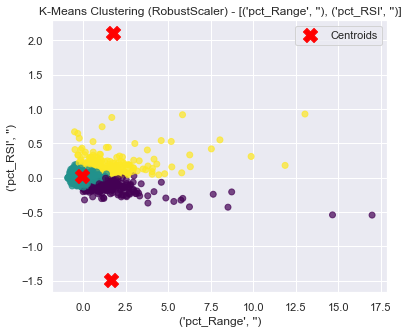

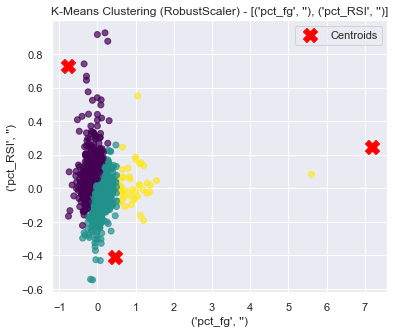

In [17]:
results = cluster_kmeans_combinations(X_train_2, max_clusters=5)

In [18]:
len(results.keys())

62

In [19]:
# Sort the results based on silhouette_score in descending order
sorted_results = sorted(results.items(), key=lambda x: x[1]["silhouette_score"], reverse=True)

# Print the key and silhouette score for each sorted item
for key, data in sorted_results:
    print(f"{key}: {data['silhouette_score']}")


RobustScaler - [('pct_fg', '')]: 0.6599886721313415
StandardScaler - [('pct_fg', '')]: 0.6599886721313413
StandardScaler - [('pct_Range', '')]: 0.6545103701943639
RobustScaler - [('pct_Range', '')]: 0.6545103701943636
StandardScaler - [('Range', '')]: 0.6047746530836207
RobustScaler - [('Range', '')]: 0.6047746530836206
StandardScaler - [('pct_Range', ''), ('pct_fg', '')]: 0.5940378269770799
StandardScaler - [('Log_Returns', '')]: 0.5724961594588345
RobustScaler - [('Log_Returns', '')]: 0.5724961594588345
StandardScaler - [('Range', ''), ('Log_Returns', '')]: 0.5591783828209919
RobustScaler - [('Range', ''), ('Log_Returns', '')]: 0.5552646981448911
StandardScaler - [('Range', ''), ('pct_fg', '')]: 0.5520008282041319
StandardScaler - [('pct_RSI', '')]: 0.5432748391177774
RobustScaler - [('pct_RSI', '')]: 0.5432748391177772
RobustScaler - [('pct_Range', ''), ('pct_fg', '')]: 0.532232551727594
StandardScaler - [('Range', ''), ('pct_Range', '')]: 0.5292727095175304
RobustScaler - [('Range'

In [20]:
def plot_top_cluster_timeseries(results, X_train_2, top_n=10):
    """
    For the top `top_n` keys in results (sorted by silhouette score descending),
    plot the features over time (using the index of X_train_2) with each datapoint
    colored by the cluster it is in. If more than one feature is in the key,
    create a subplot for each feature.
    
    Parameters:
        results (dict): Dictionary where keys are strings like "Scaler - (features,...)"
                        and values include 'labels' and 'silhouette_score'.
        X_train_2 (pd.DataFrame): The original dataframe with a datetime index.
        top_n (int): Number of top keys (by silhouette score) to plot.
    """
    # Sort the results by silhouette score (largest first)
    sorted_results = sorted(results.items(), 
                            key=lambda x: x[1]["silhouette_score"], 
                            reverse=True)
    
    # Take only the top_n keys
    top_results = sorted_results[:top_n]
    
    for key, data in top_results:
        # Expecting key to be of form "ScalerName - (feature1, feature2, ...)"
        try:
            scaler_name, features_str = key.split(" - ", 1)
            # Evaluate the features string to get a tuple or list of features.
            # (This assumes that the features were stored in a Python tuple representation.)
            selected_features = eval(features_str)
            # If it's a single feature (a string) not in a tuple, convert to list.
            if isinstance(selected_features, str):
                selected_features = [selected_features]
        except Exception as e:
            print(f"Error parsing key '{key}': {e}")
            continue
        
        # Extract the subset of X_train_2 for these features (drop rows with missing values)
        df_subset = X_train_2[list(selected_features)].dropna()
        
        # Get the cluster labels corresponding to the rows of df_subset.
        # (Assuming that the clustering was done on the same dropna subset.)
        labels = data["labels"]
        
        # If the length of labels doesn't match the subset, print a warning and skip
        if len(labels) != len(df_subset):
            print(f"Warning: For key {key}, number of labels ({len(labels)}) doesn't match number of rows ({len(df_subset)}). Skipping.")
            continue
        
        num_features = len(selected_features)
        # Create a figure with one subplot per feature
        fig, axes = plt.subplots(num_features, 1, figsize=(12, 4*num_features), sharex=True)
        
        # If only one feature, wrap axes in a list
        if num_features == 1:
            axes = [axes]
            
        # Create a colormap. You could also use a discrete colormap if you know the number of clusters.
        cmap = plt.cm.viridis
        
        # For each feature, plot the timeseries scatter with colors from cluster labels
        for ax, feat in zip(axes, selected_features):
            scatter = ax.scatter(df_subset.index, df_subset[feat], c=labels, cmap=cmap, s=50, edgecolor='k', alpha=0.7)
            ax.set_ylabel(feat)
            ax.set_title(f"{feat} over time (Clusters)")

        # Set the overall title with key and silhouette score
        fig.suptitle(f"{key} | Silhouette Score: {data['silhouette_score']:.4f}", fontsize=14, y=0.98)
        
        # Optionally, add a colorbar to the last subplot
        cbar = fig.colorbar(scatter, ax=axes, orientation='vertical', pad=0.02)
        cbar.set_label("Cluster Label")
        
        plt.xlabel("Date")
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

C:\Users\gpari\AppData\Local\Temp/ipykernel_6248/1564151716.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


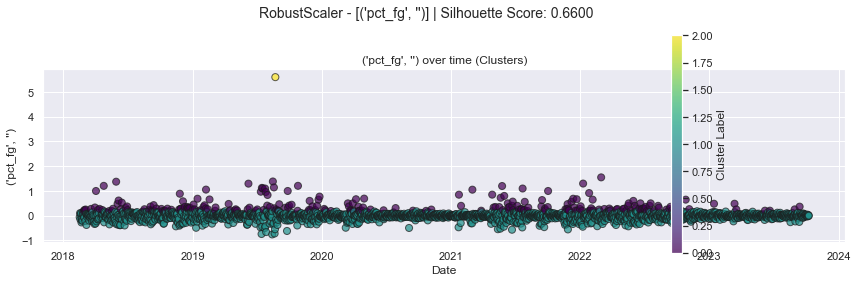

C:\Users\gpari\AppData\Local\Temp/ipykernel_6248/1564151716.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


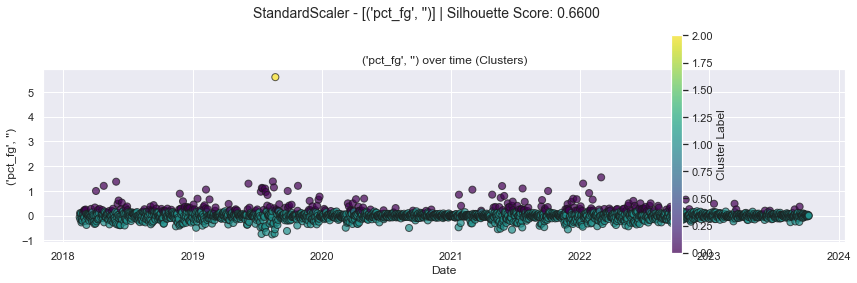

C:\Users\gpari\AppData\Local\Temp/ipykernel_6248/1564151716.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


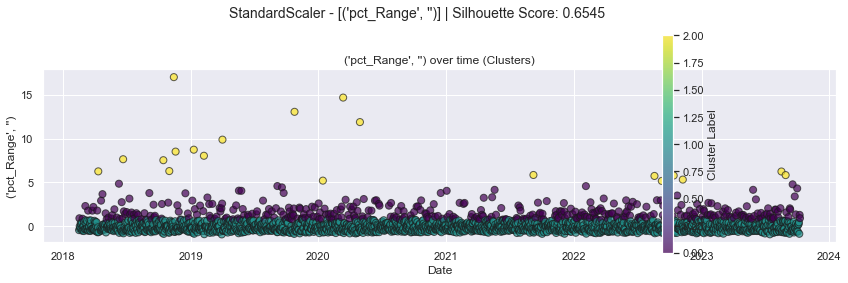

C:\Users\gpari\AppData\Local\Temp/ipykernel_6248/1564151716.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


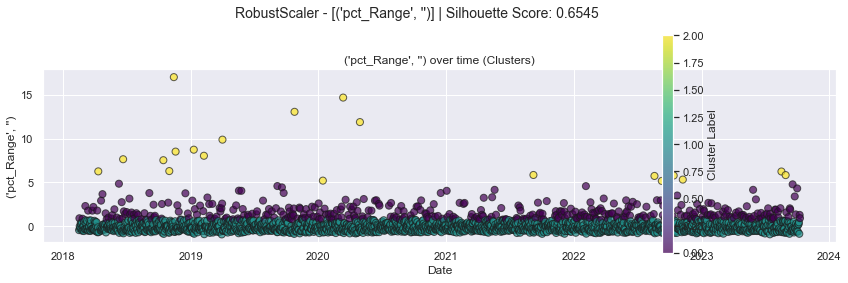

C:\Users\gpari\AppData\Local\Temp/ipykernel_6248/1564151716.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


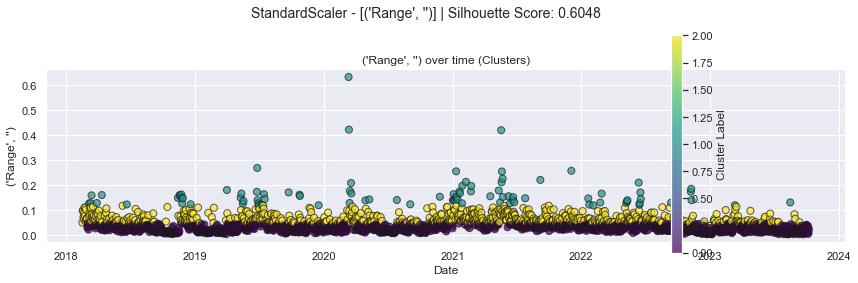

C:\Users\gpari\AppData\Local\Temp/ipykernel_6248/1564151716.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


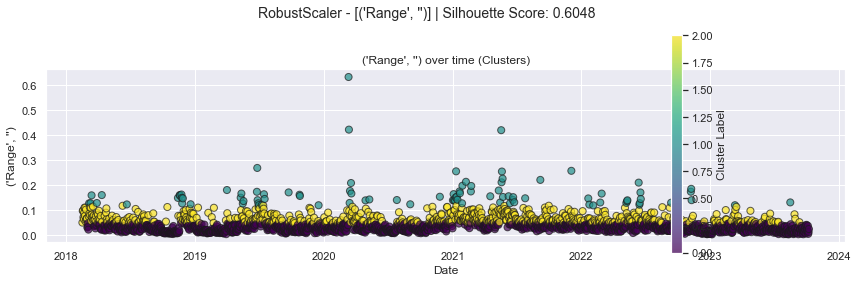

C:\Users\gpari\AppData\Local\Temp/ipykernel_6248/1564151716.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


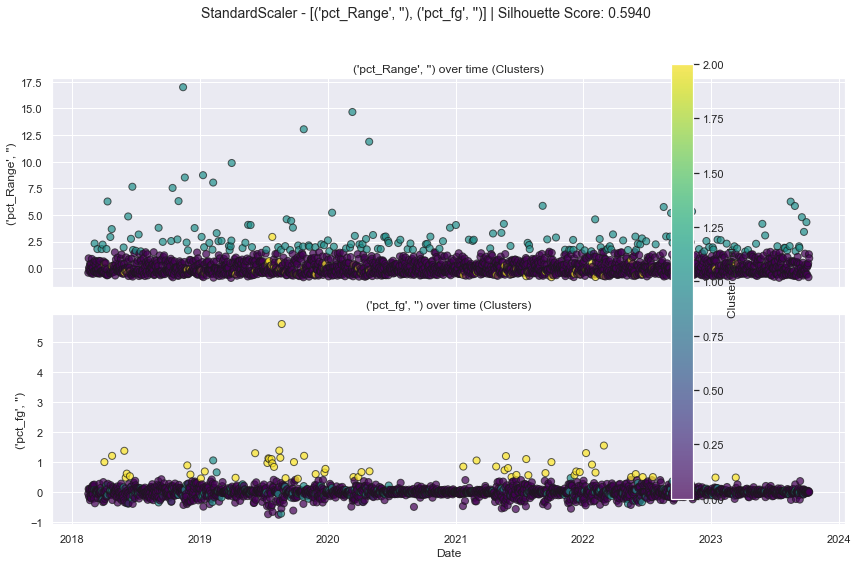

C:\Users\gpari\AppData\Local\Temp/ipykernel_6248/1564151716.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


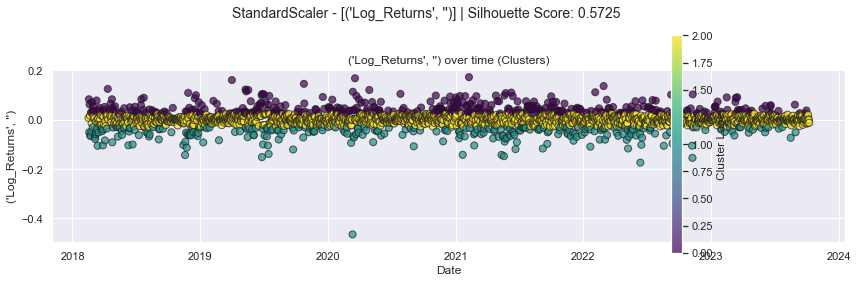

C:\Users\gpari\AppData\Local\Temp/ipykernel_6248/1564151716.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


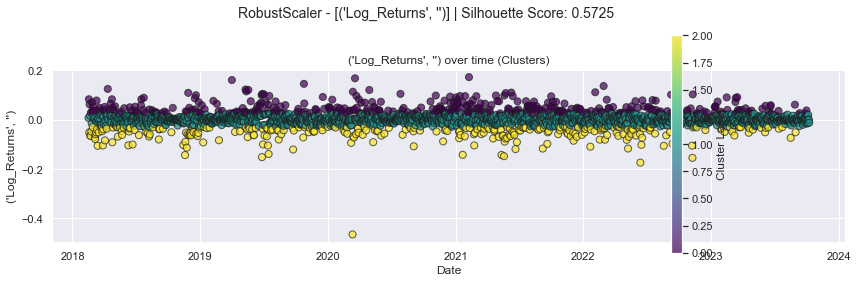

C:\Users\gpari\AppData\Local\Temp/ipykernel_6248/1564151716.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


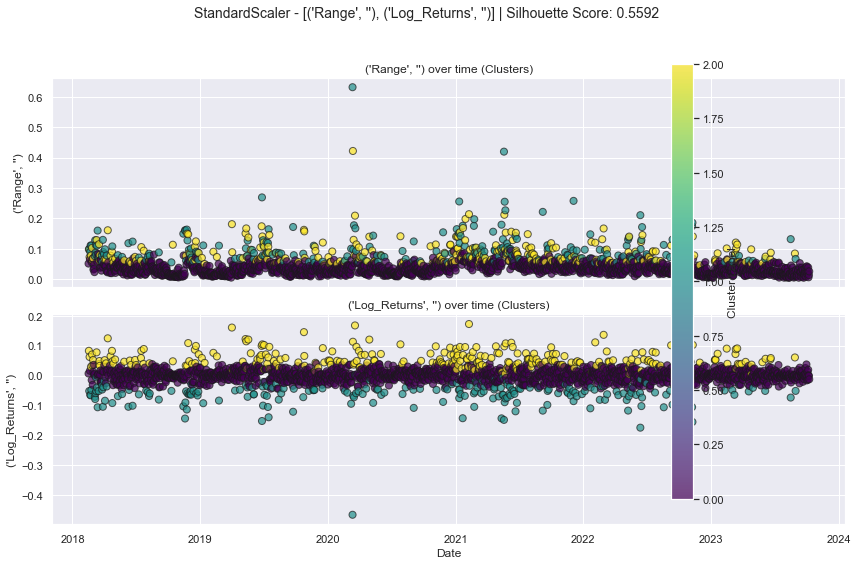

In [21]:
#plot_top_cluster_timeseries(results, X_train_2, top_n=10)

In [24]:
from matplotlib import cm

def plot_top_cluster_prices(results, X_train_2, train_price, top_n=10):
    """
    For the top `top_n` k-means models (sorted by silhouette score descending)
    in the results dictionary, plot the train_price time series with a colored line
    that changes color based on the cluster label for that time segment.
    
    Parameters:
      results (dict): Dictionary with keys formatted as "Scaler - (feature1, feature2, ...)"
                      and values containing 'labels' (cluster labels), 'kmeans_model', etc.
      X_train_2 (pd.DataFrame): DataFrame used for clustering (indexed by date).
      train_price (pd.Series or pd.DataFrame): Price data with the same date index as X_train_2.
      top_n (int): Number of top models to plot (default: 10).
    
    Returns:
      None (Displays plots)
    """
    # Sort results by silhouette score (largest to smallest)
    sorted_results = sorted(results.items(), 
                            key=lambda x: x[1]["silhouette_score"], 
                            reverse=True)
    
    # Select the top_n results
    top_results = sorted_results[:top_n]
    
    for key, model_data in top_results:
        # Parse key: expected format "ScalerName - (feature1, feature2, ...)"
        try:
            scaler_name, features_str = key.split(" - ", 1)
            selected_features = eval(features_str)
            if isinstance(selected_features, str):
                selected_features = [selected_features]
        except Exception as e:
            print(f"Error parsing key '{key}': {e}")
            continue
        
        # Get the subset of X_train_2 for these features and drop missing values
        df_subset = X_train_2[list(selected_features)].dropna()
        indices = df_subset.index
        
        # Get the cluster labels for this model
        labels = model_data["labels"]
        
        # Ensure the labels length matches the subset
        if len(labels) != len(df_subset):
            print(f"Warning: For key {key}, number of labels ({len(labels)}) doesn't match number of rows ({len(df_subset)}). Skipping.")
            continue
        
        # Align train_price with the subset
        price_subset = train_price.loc[indices]
        
        # Prepare a colormap
        unique_labels = np.unique(labels)
        n_labels = len(unique_labels)
        cmap = cm.get_cmap('viridis', n_labels)
        # Create a mapping from cluster label to a color
        label2color = {label: cmap(i) for i, label in enumerate(unique_labels)}
        
        # Plotting
        plt.figure(figsize=(18, 8))
        
        # We want to plot a continuous line over time with color segments.
        # We do this by grouping contiguous segments that share the same cluster label.
        dates = np.array(price_subset.index)
        prices = np.array(price_subset.values).flatten()
        
        # Initialize the first segment
        seg_start = 0
        segments = []
        for i in range(1, len(labels)):
            # If the label changes, mark the segment boundary
            if labels[i] != labels[i-1]:
                segments.append((seg_start, i-1, labels[i-1]))
                seg_start = i
        # Append the final segment
        segments.append((seg_start, len(labels)-1, labels[-1]))
        
        # Now plot each segment as a line with the corresponding color
        for start, end, cluster in segments:
            plt.plot(dates[start:end+1], prices[start:end+1], 
                     color=label2color[cluster], linewidth=3, label=f"Cluster {cluster}")
        
        plt.title(f"{key} | Silhouette Score: {model_data['silhouette_score']:.4f}", fontsize=16)
        plt.xlabel("Date", fontsize=14)
        plt.ylabel("Price", fontsize=14)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

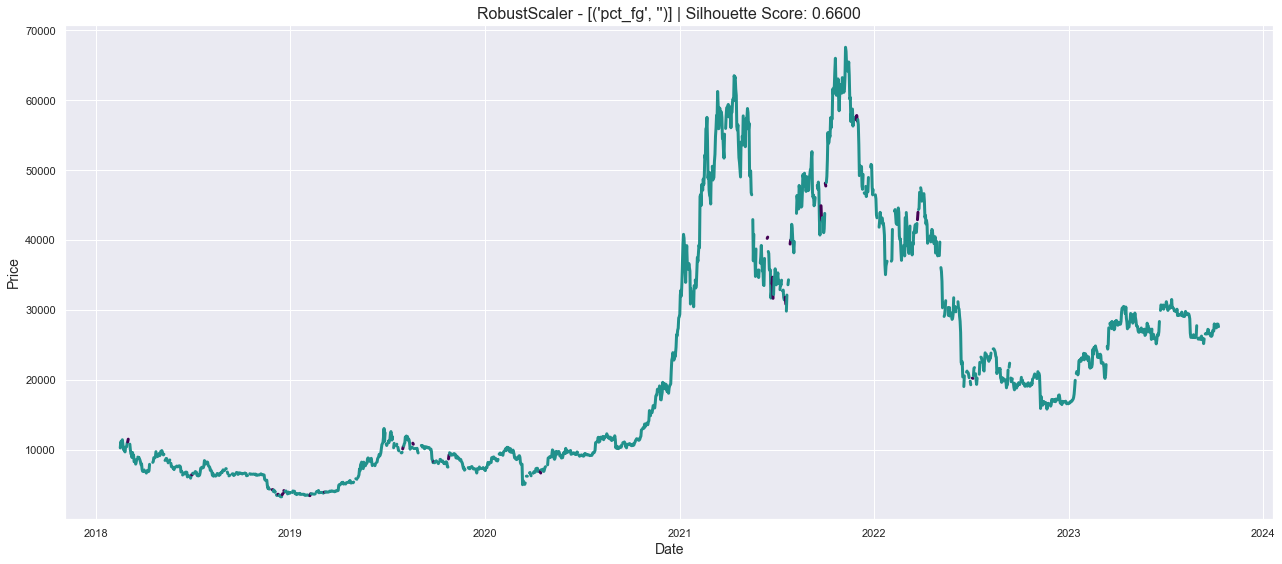

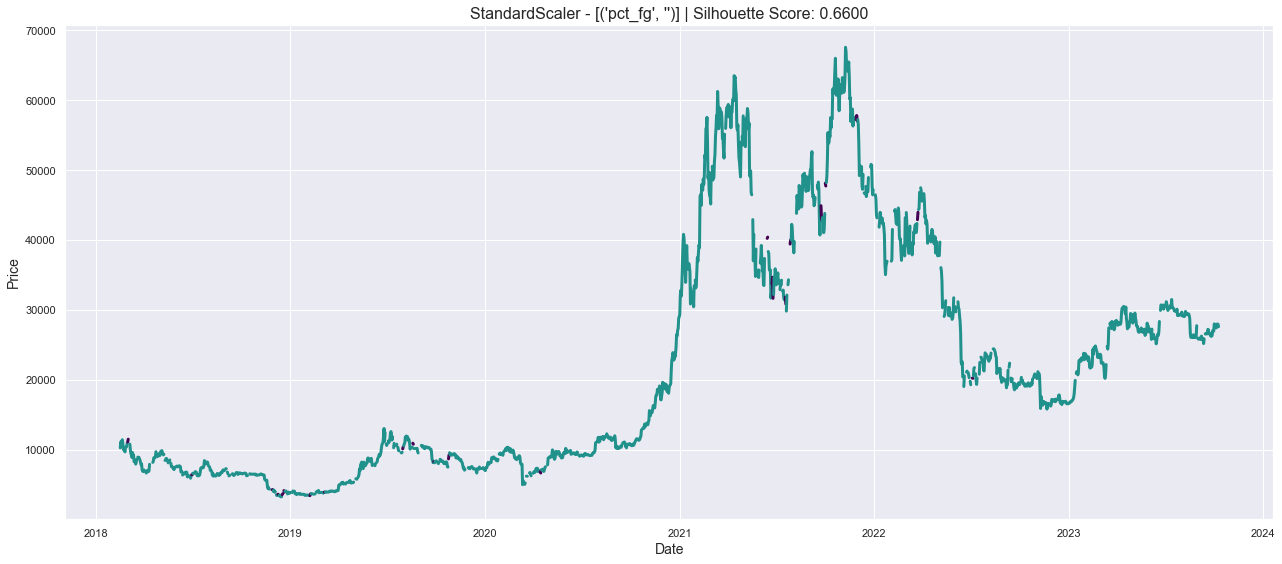

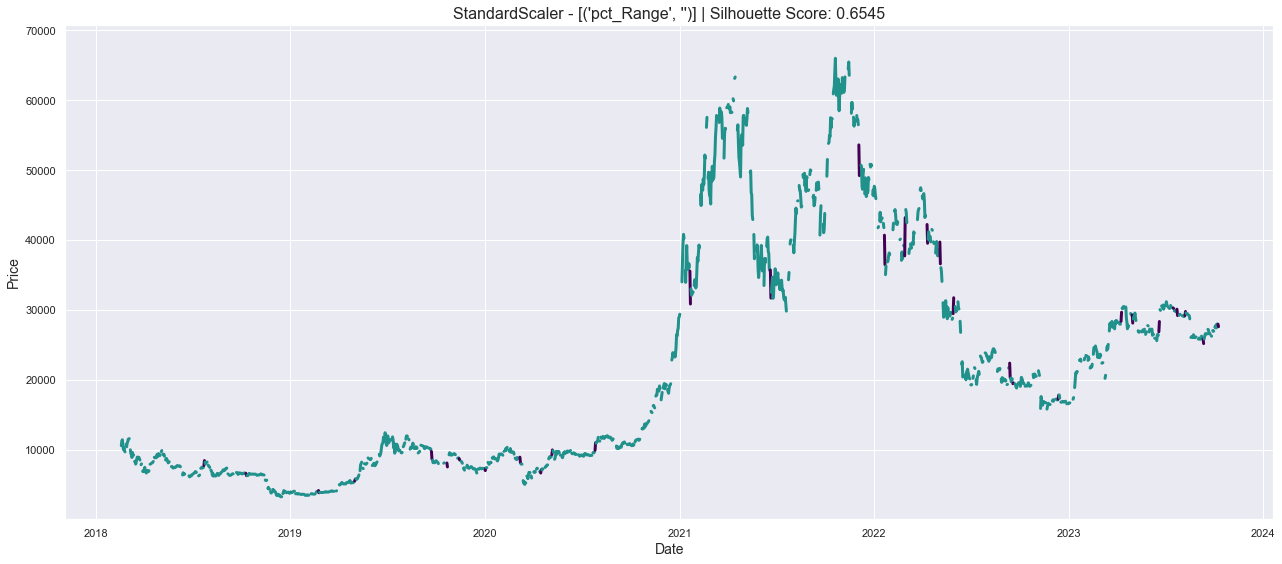

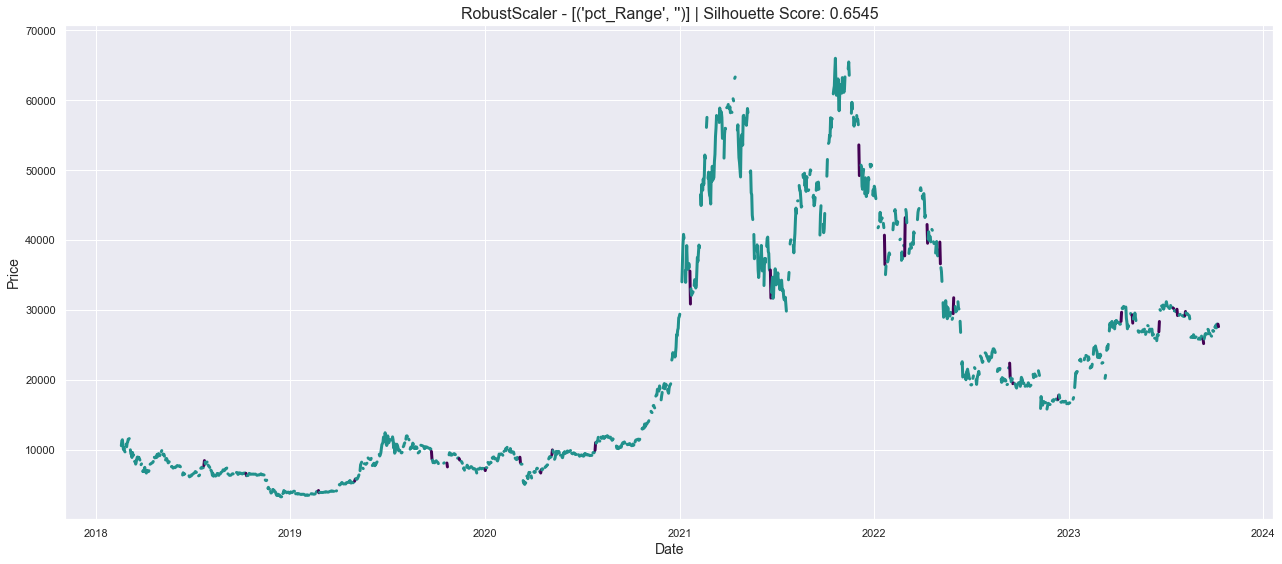

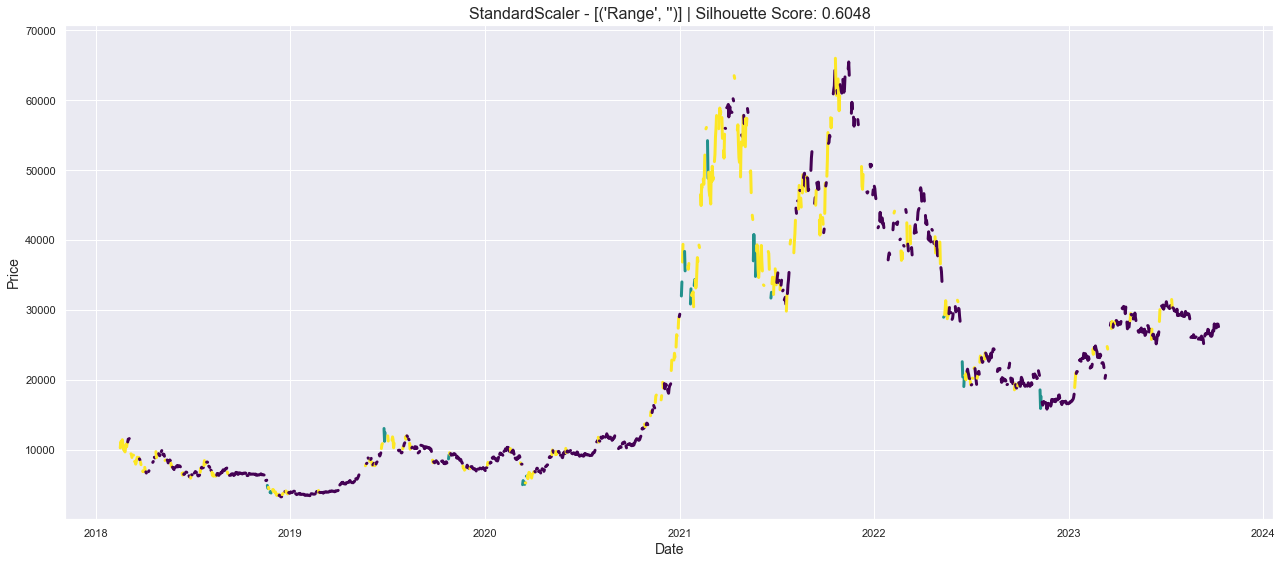

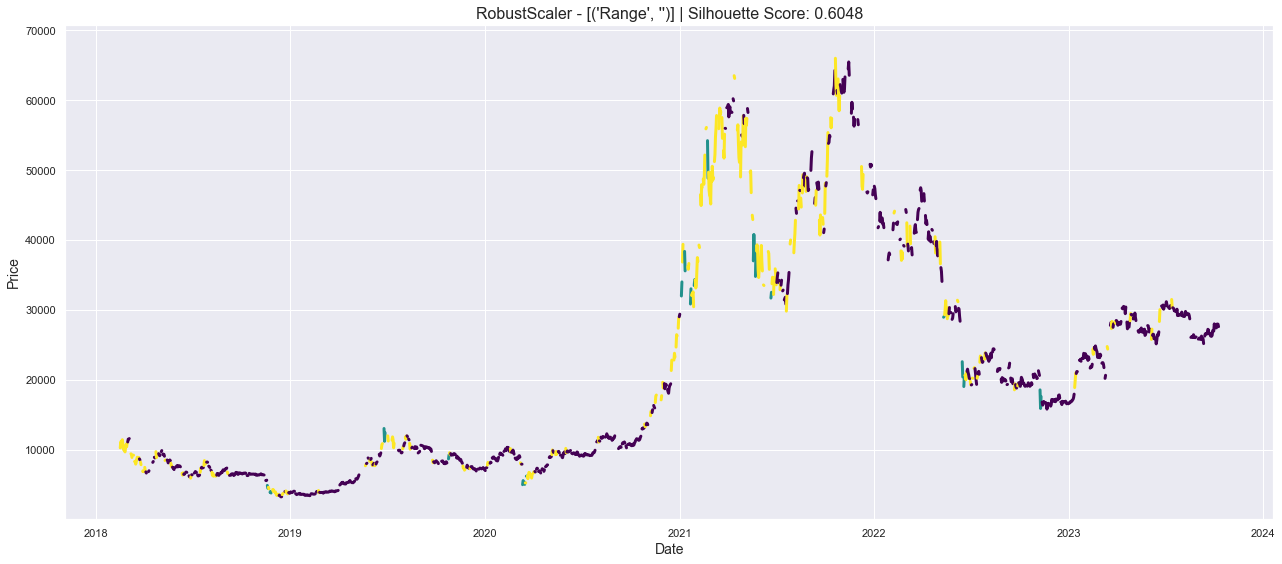

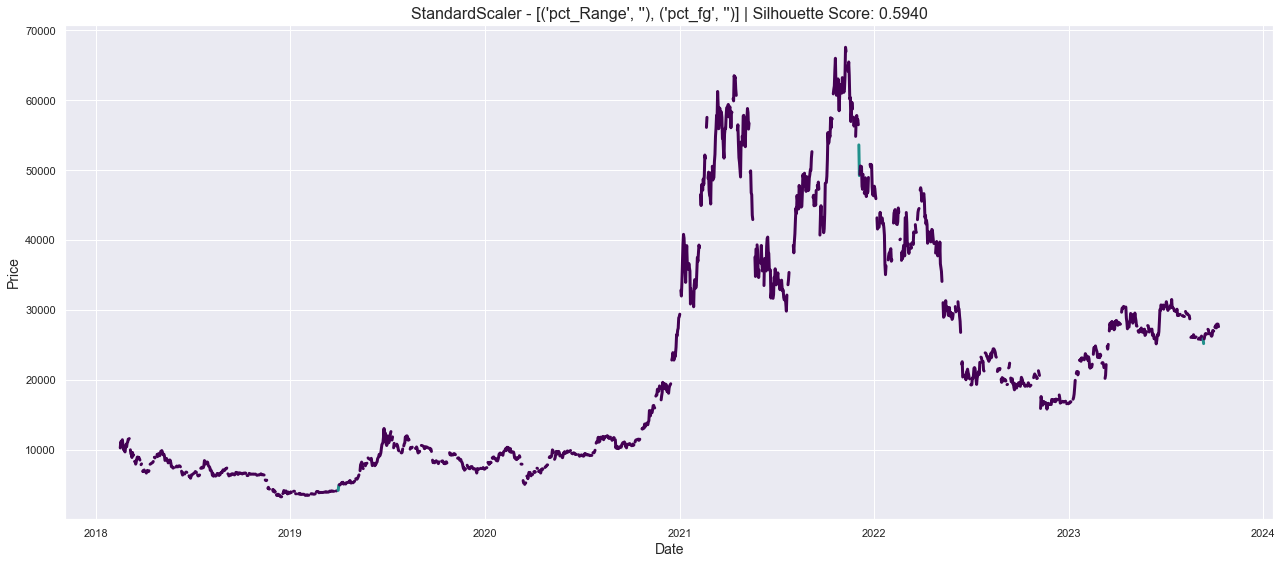

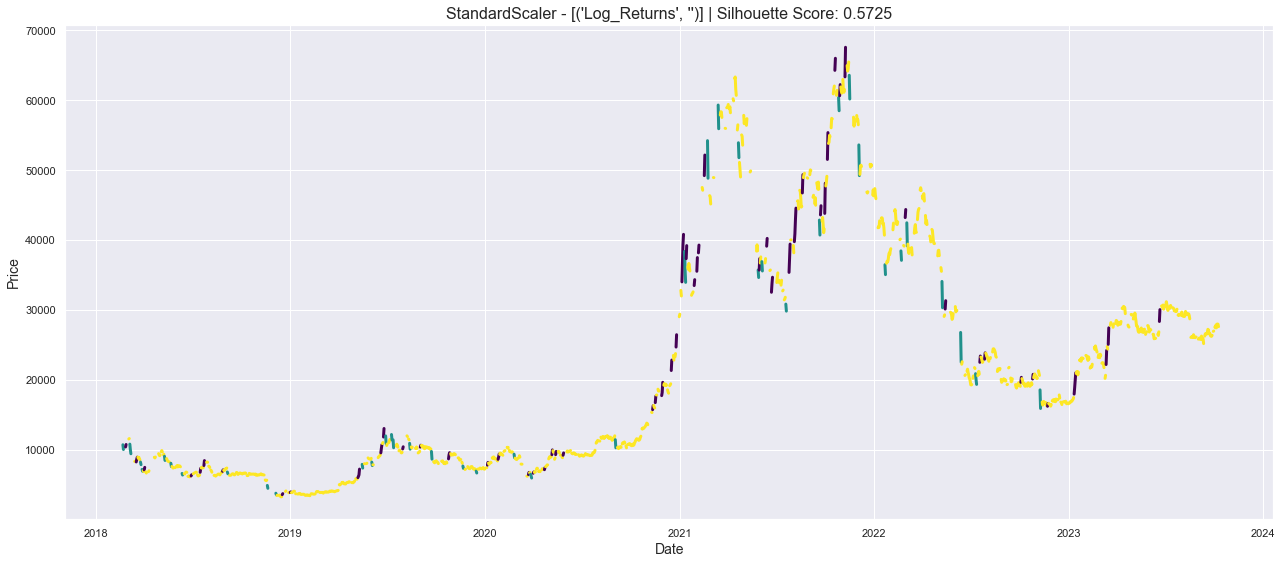

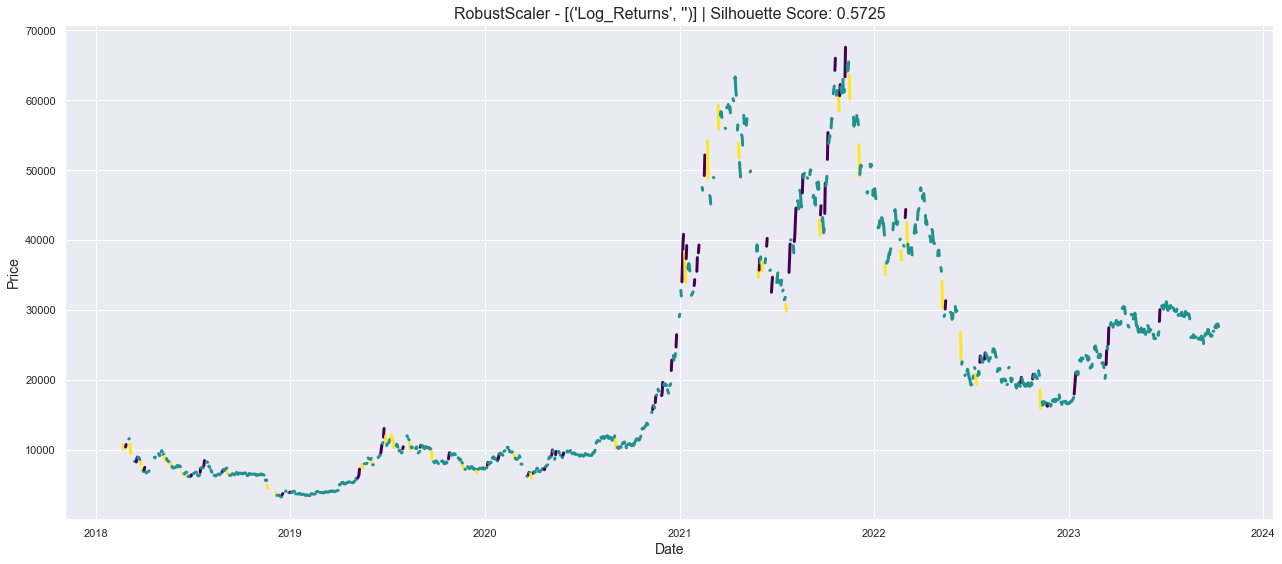

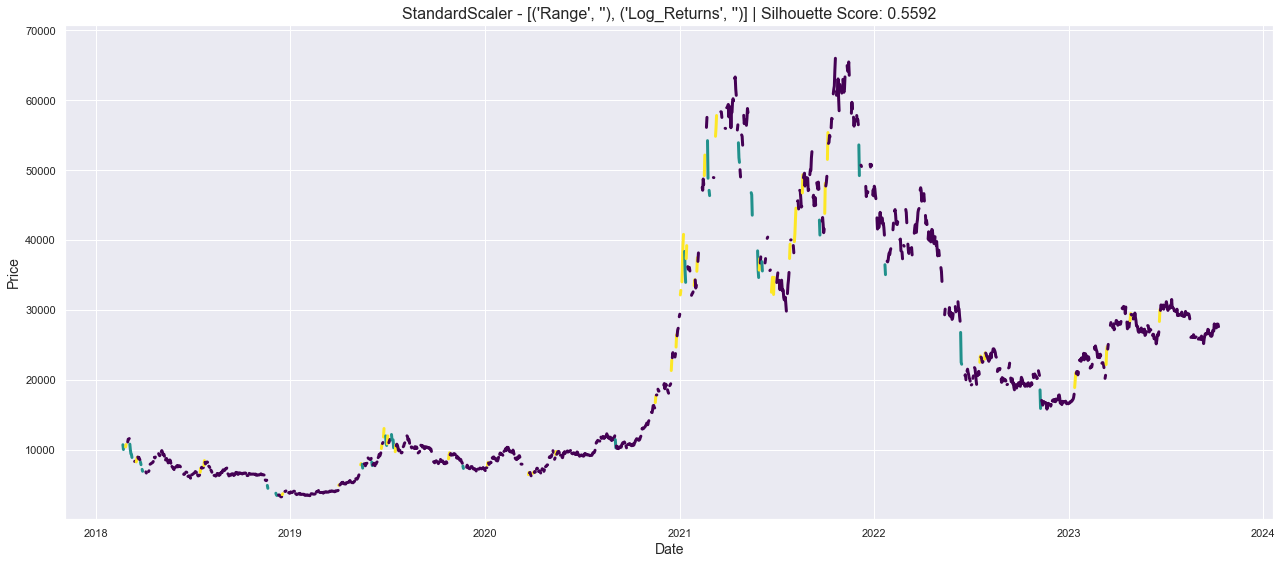

In [25]:
#plot_top_cluster_prices(results, X_train_2, train_price, top_n=10)

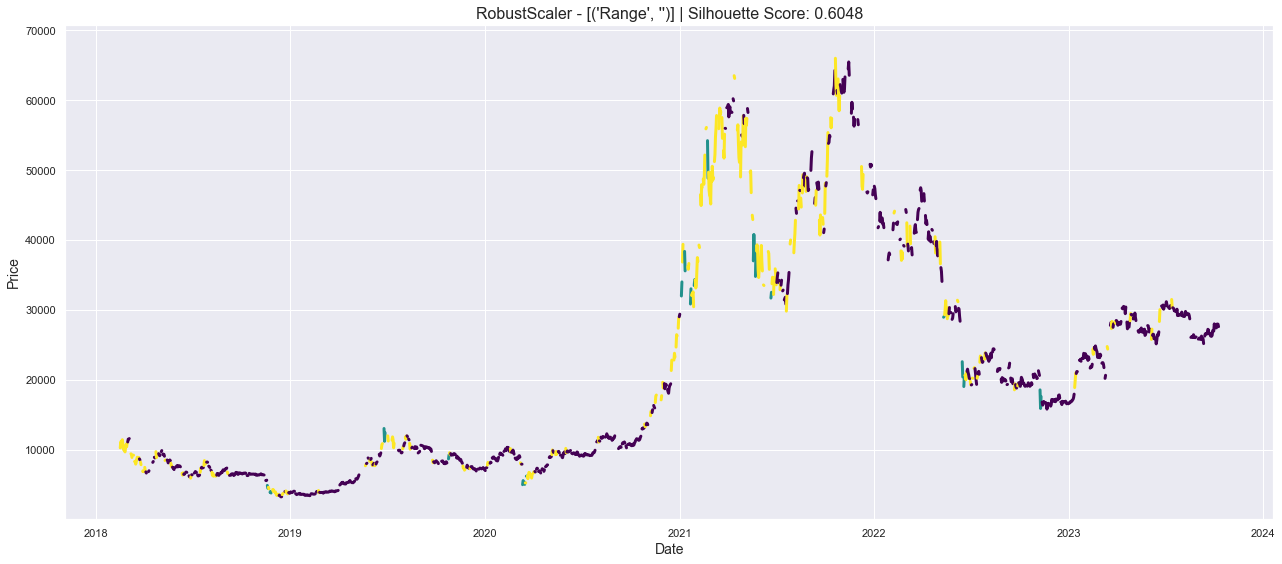

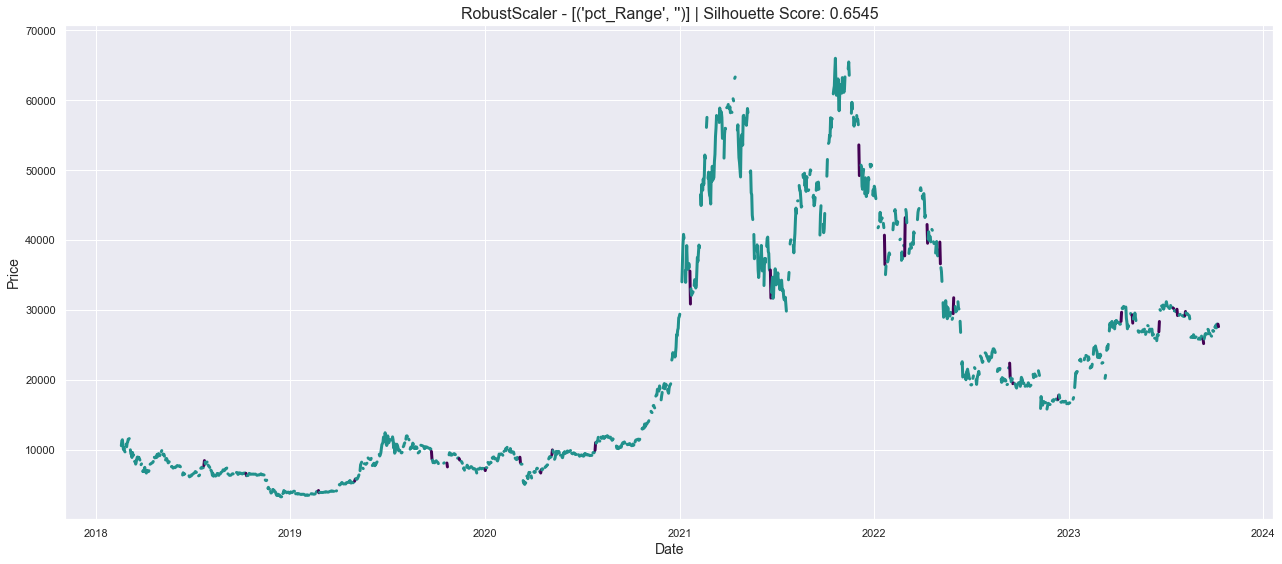

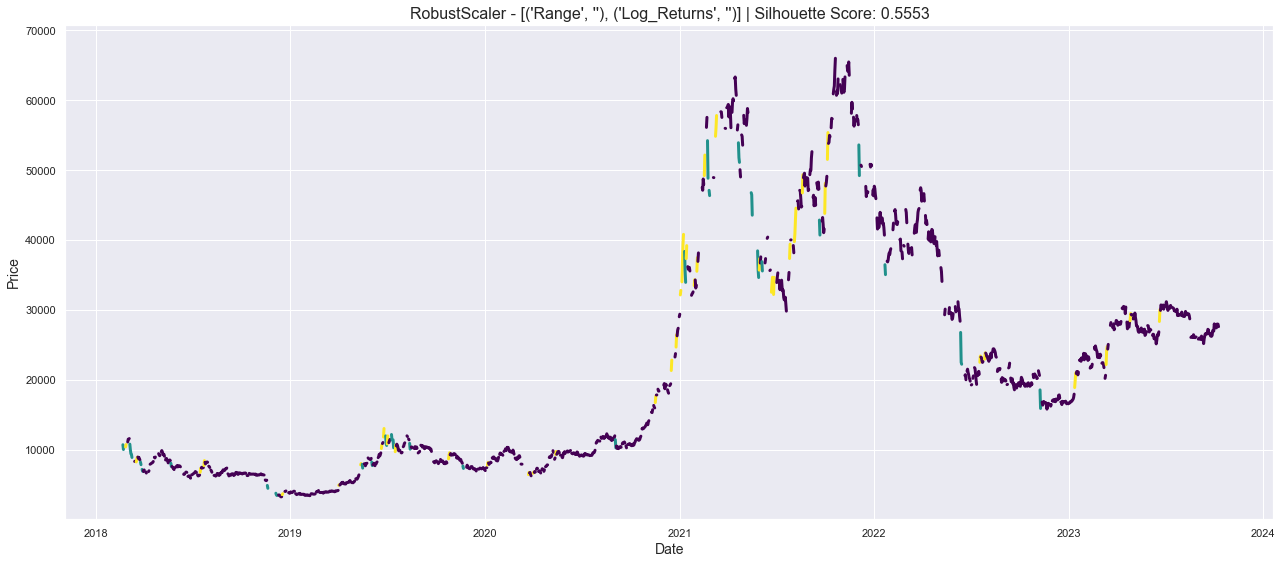

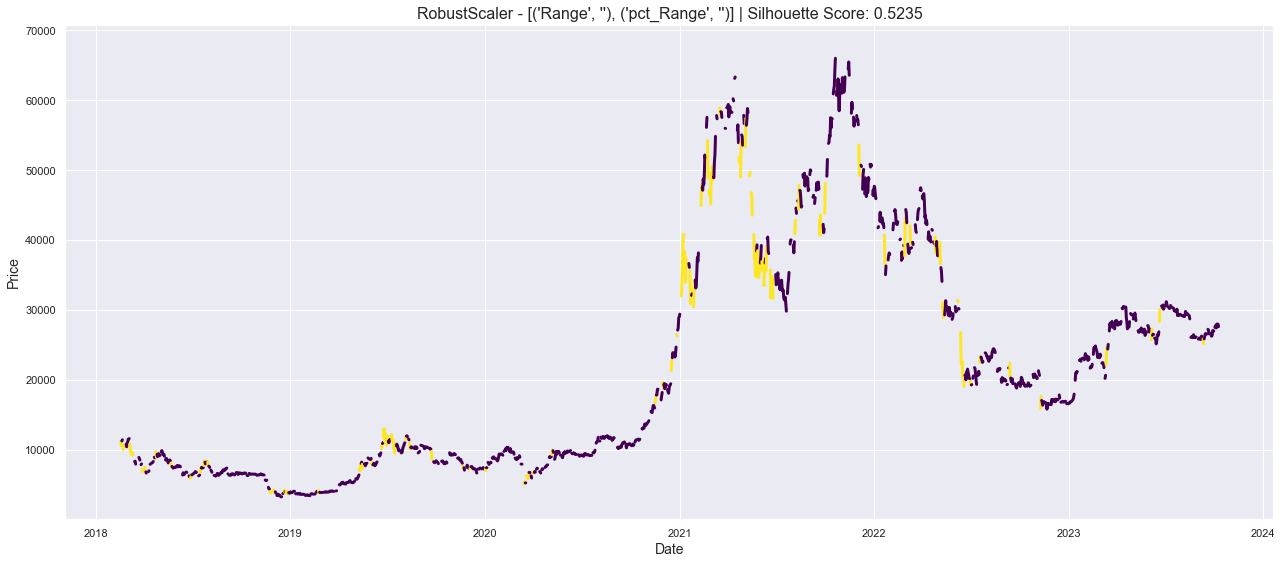

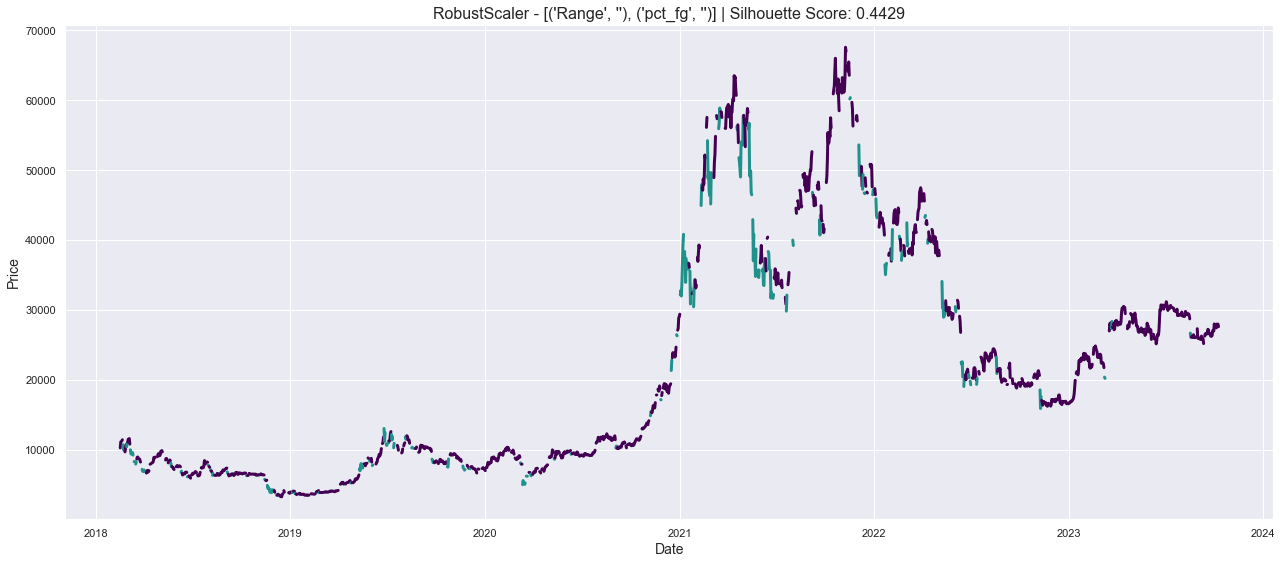

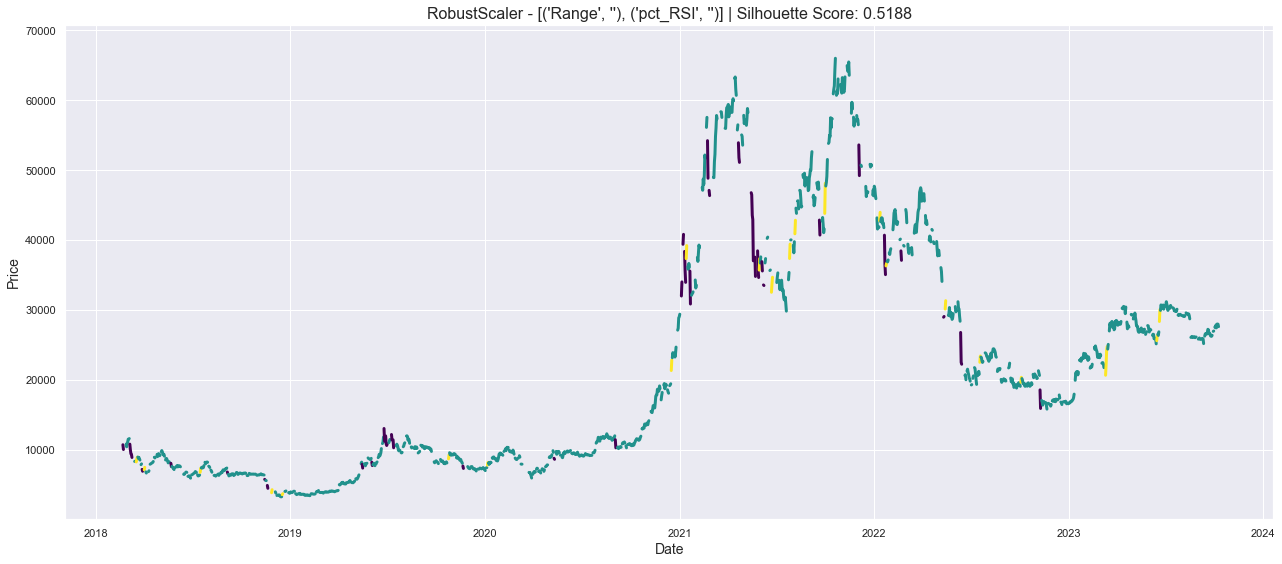

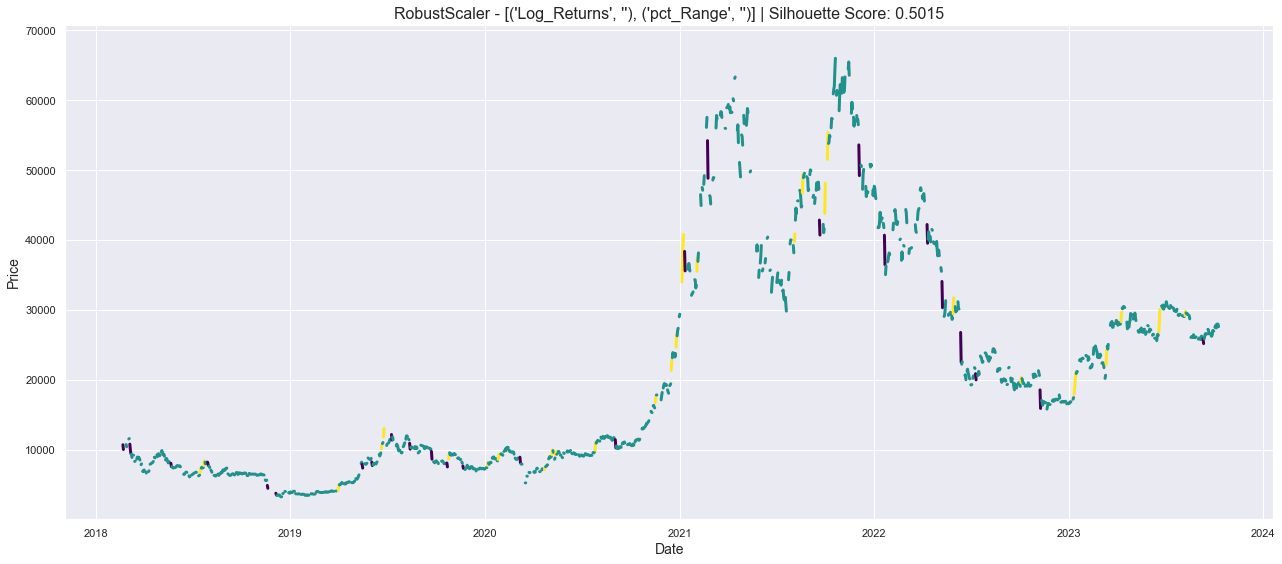

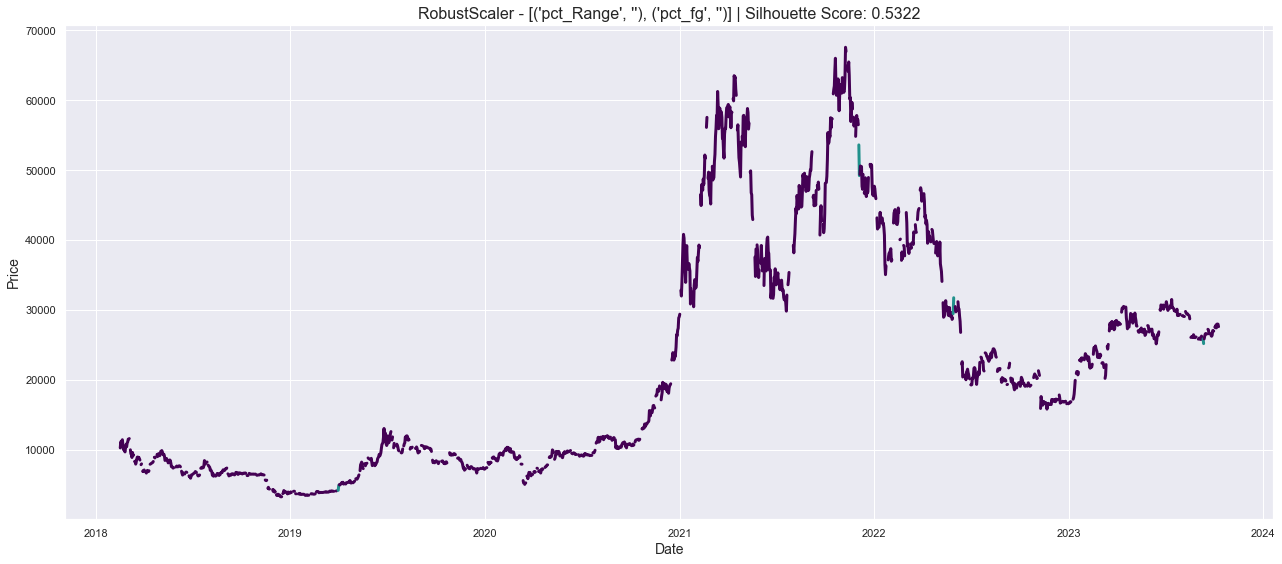

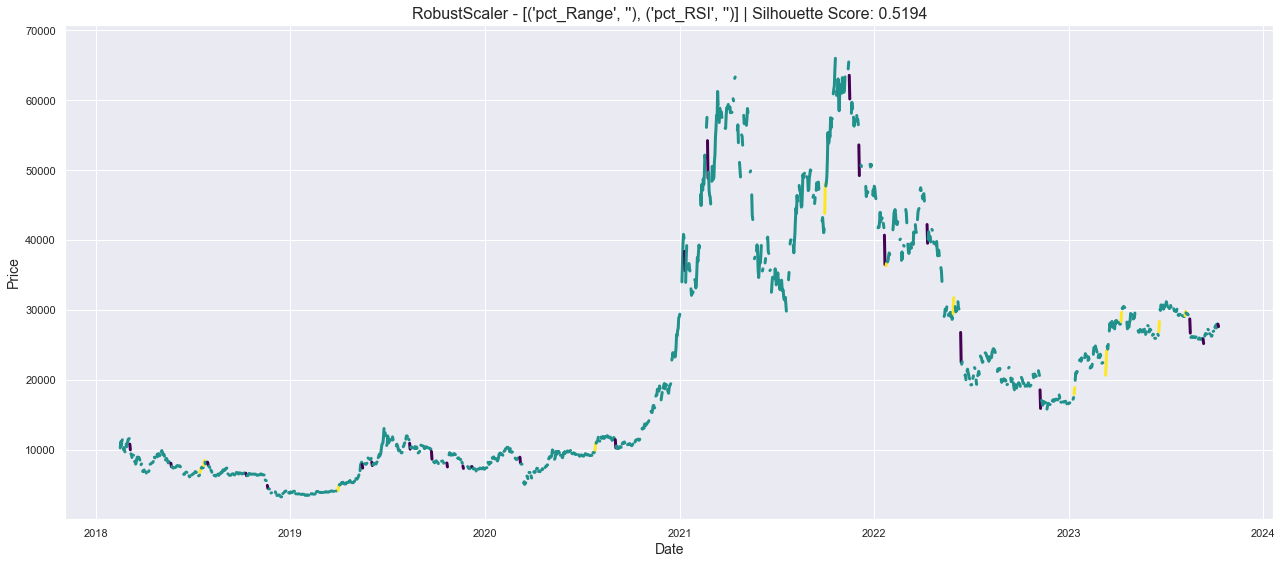

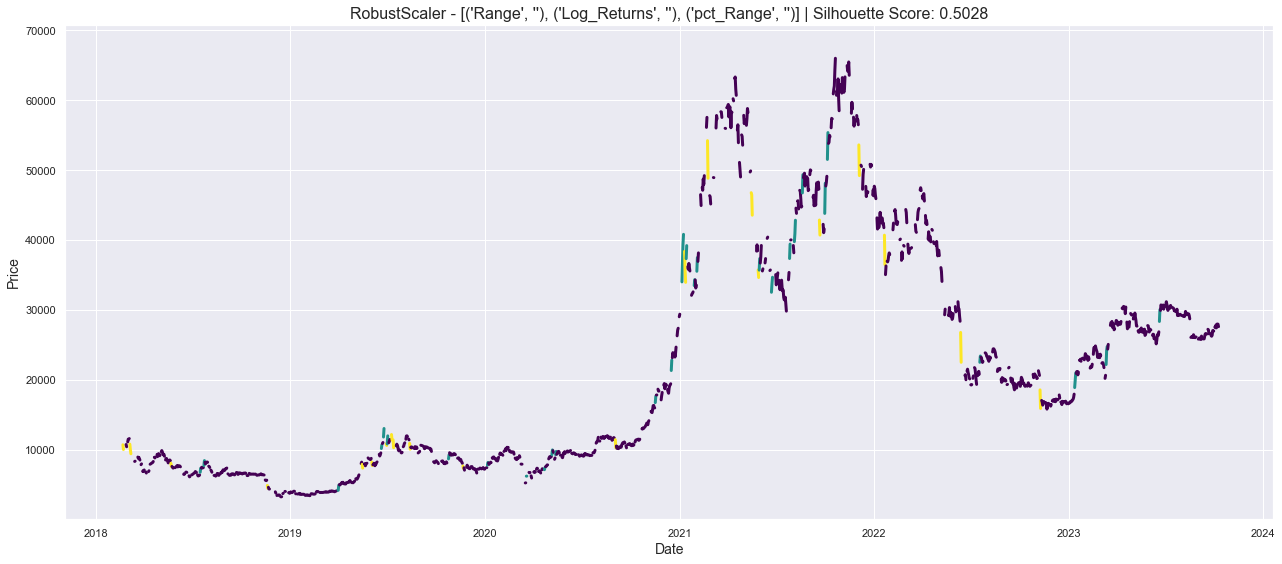

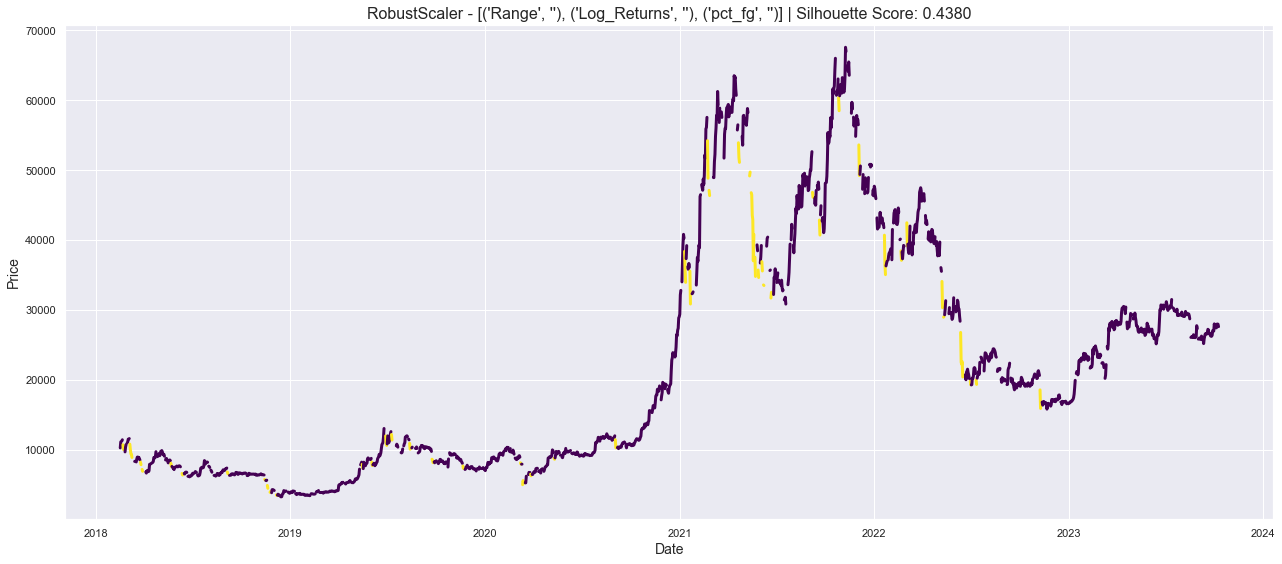

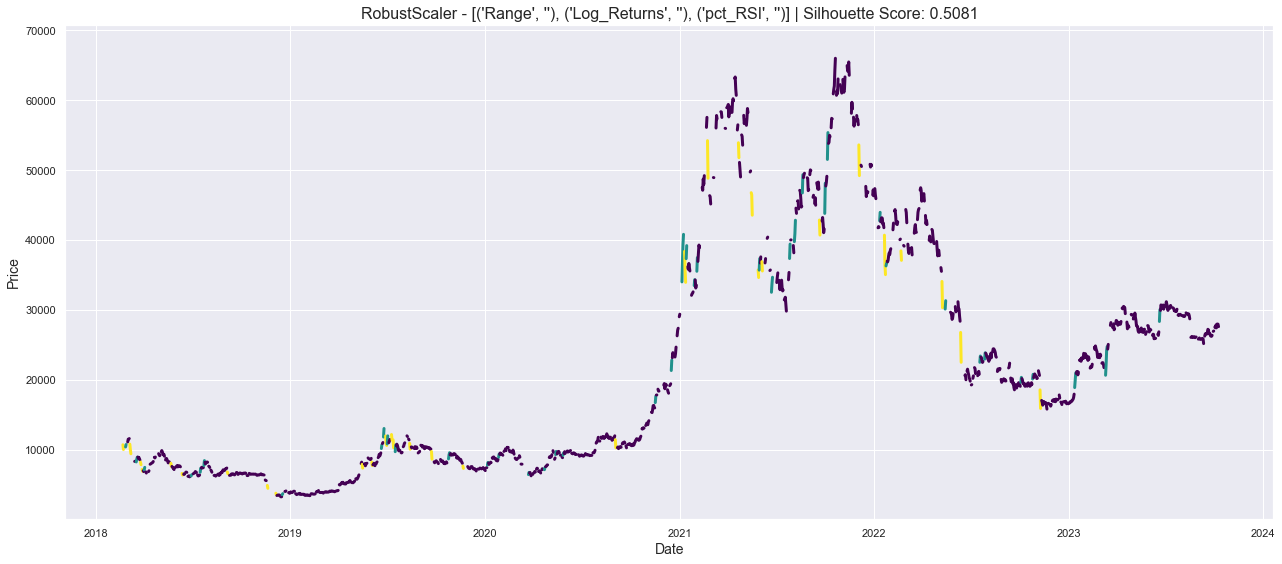

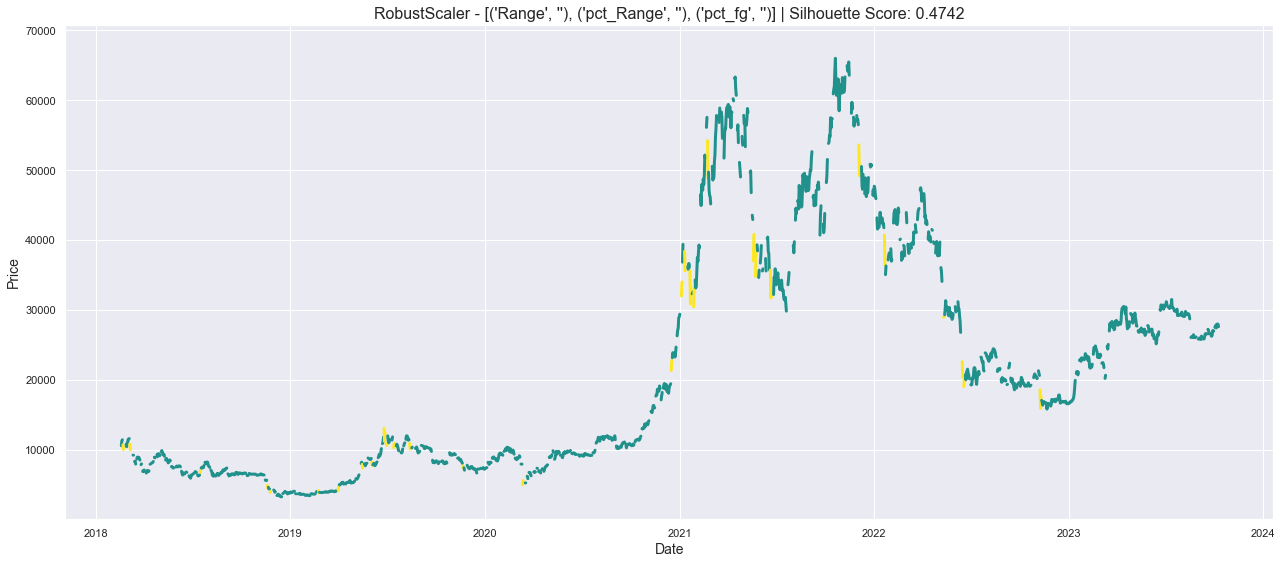

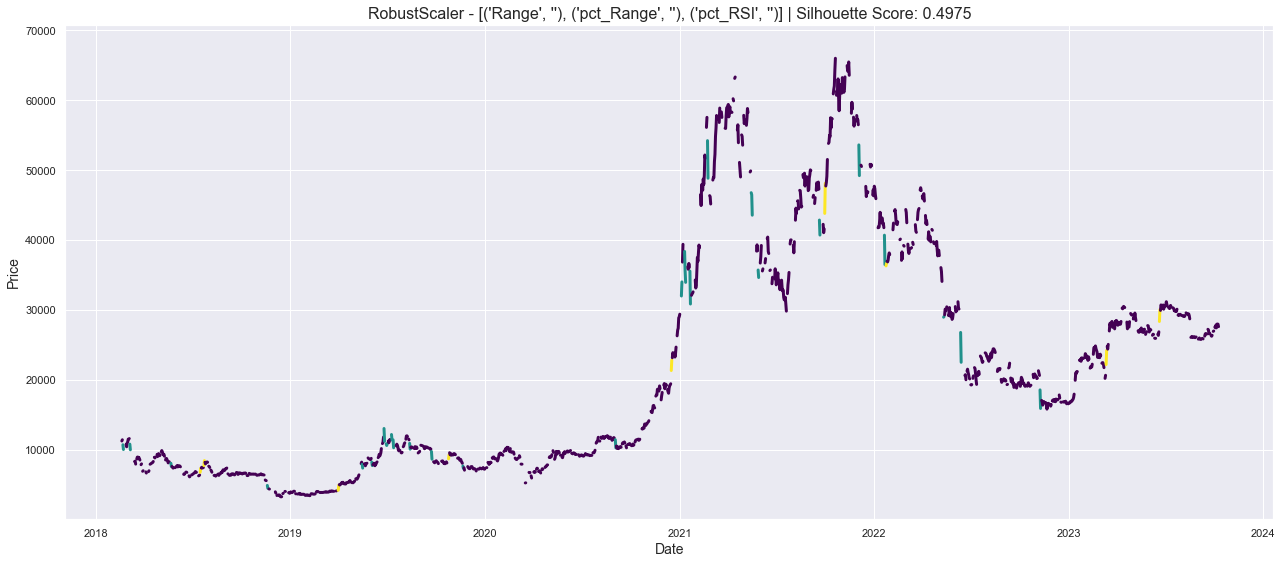

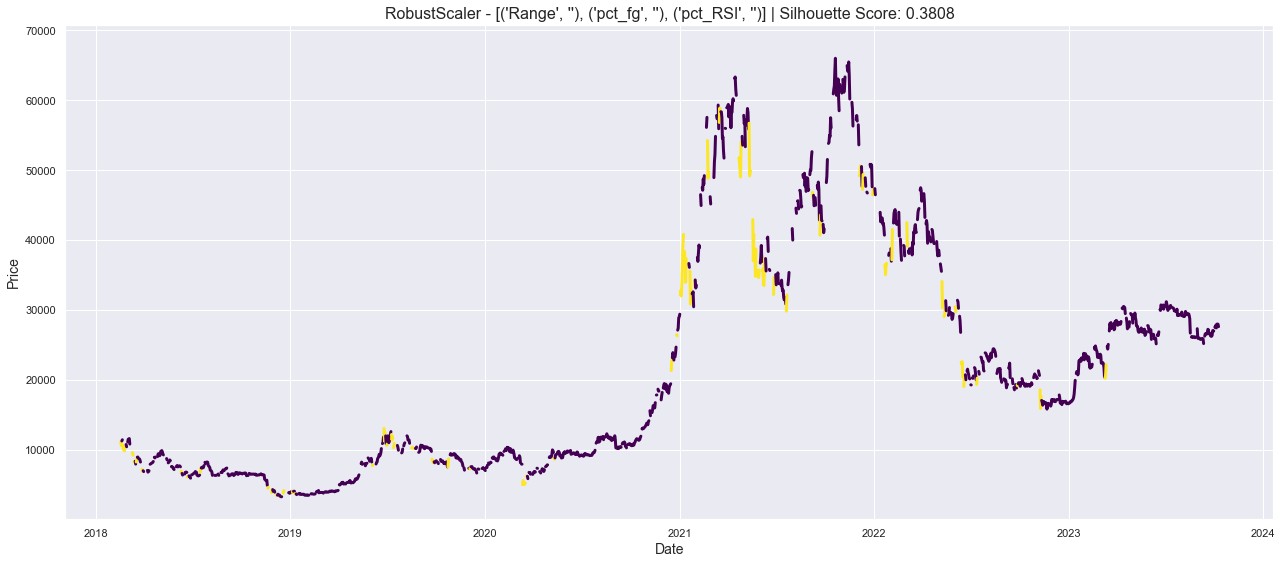

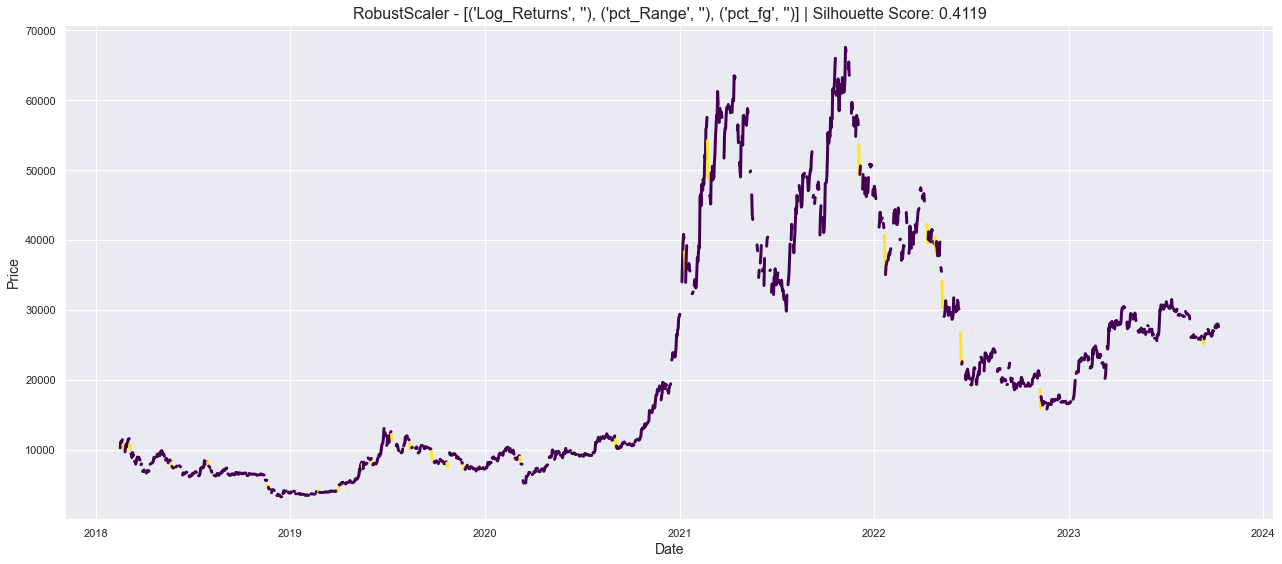

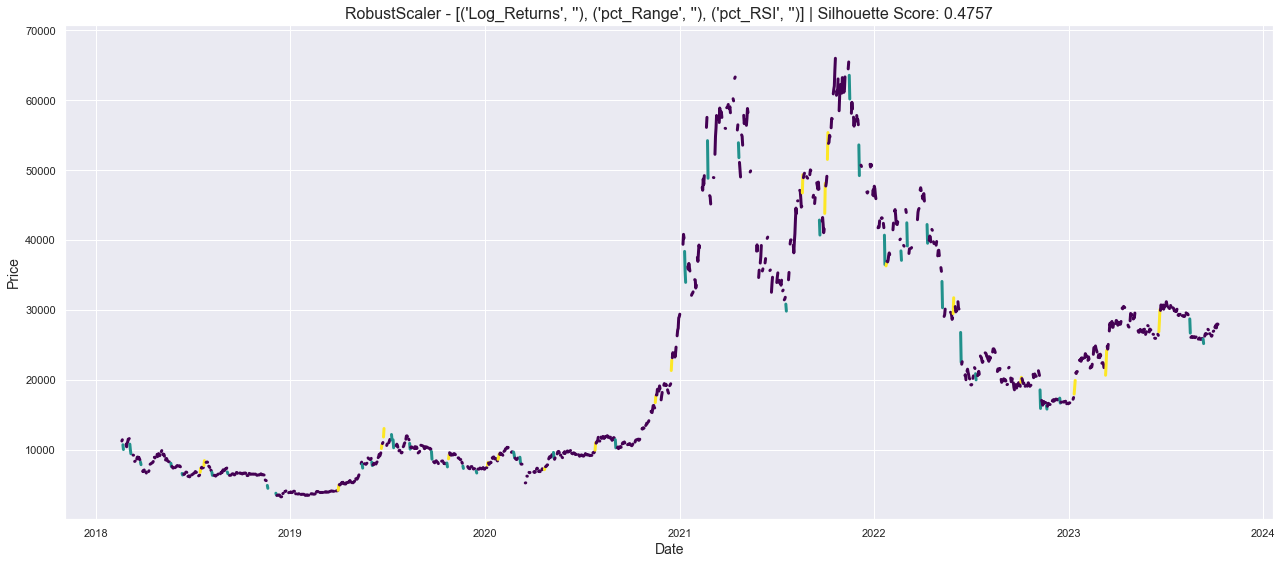

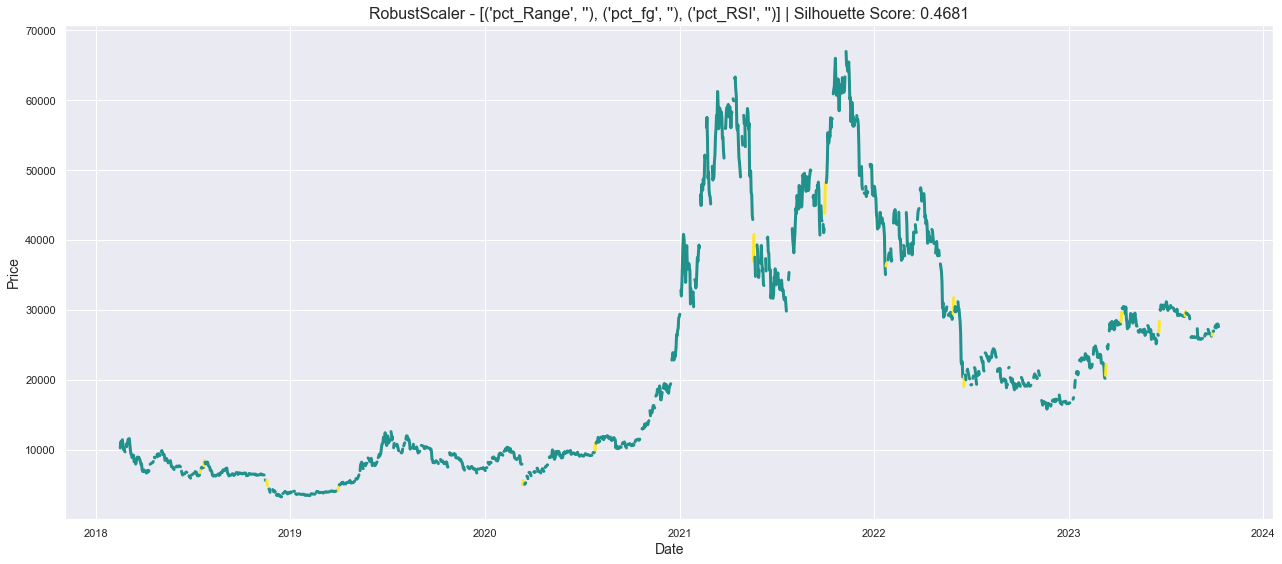

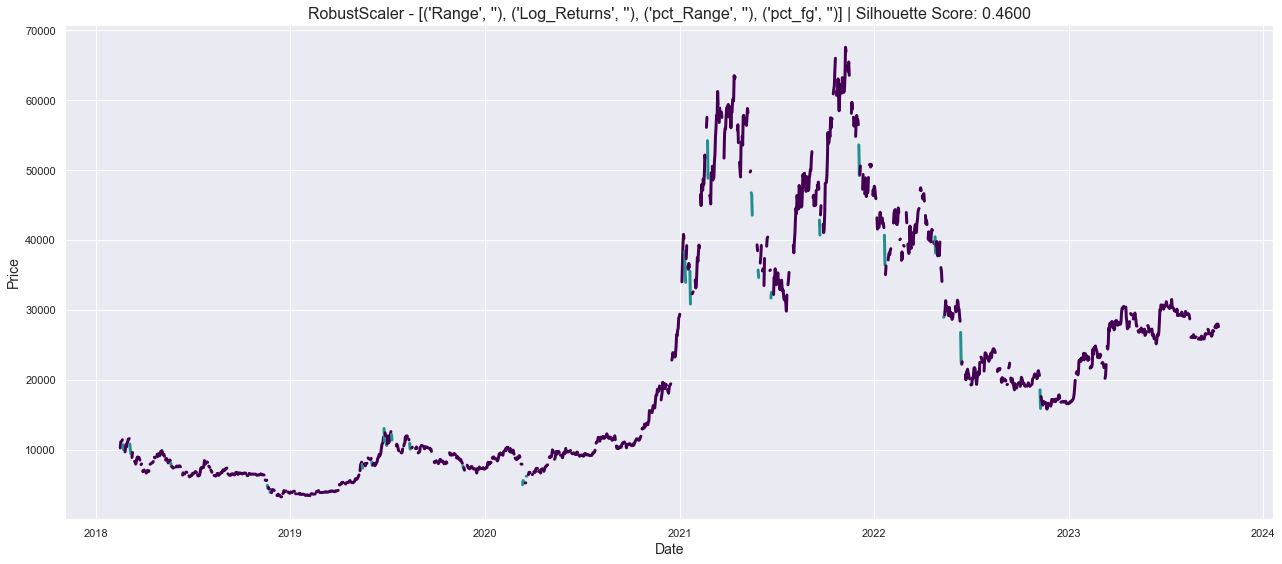

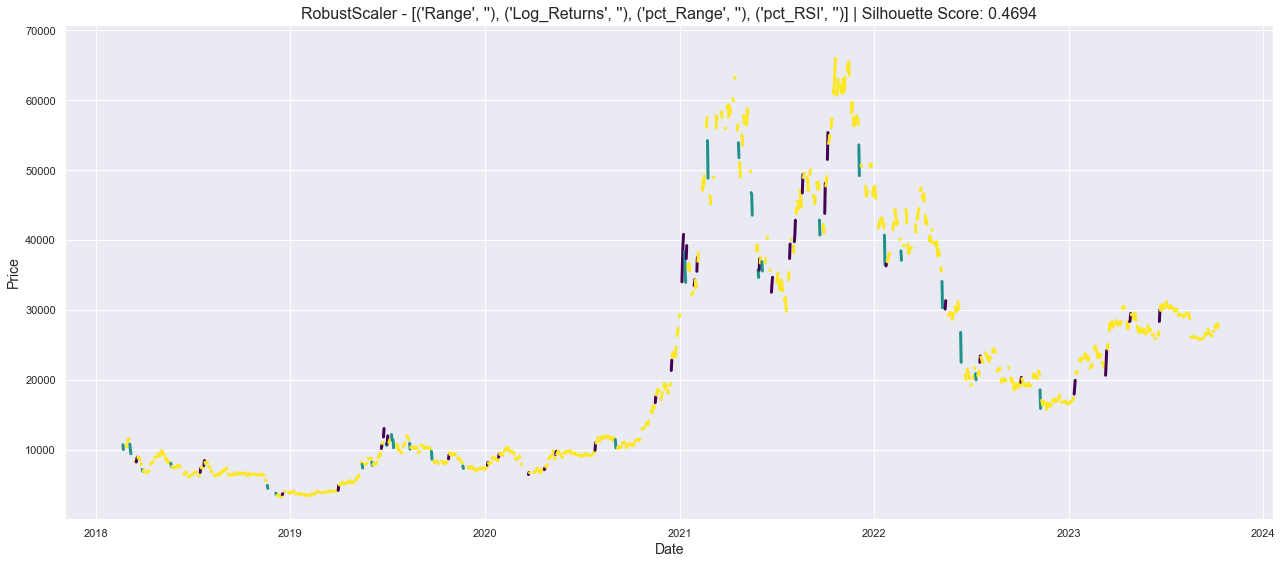

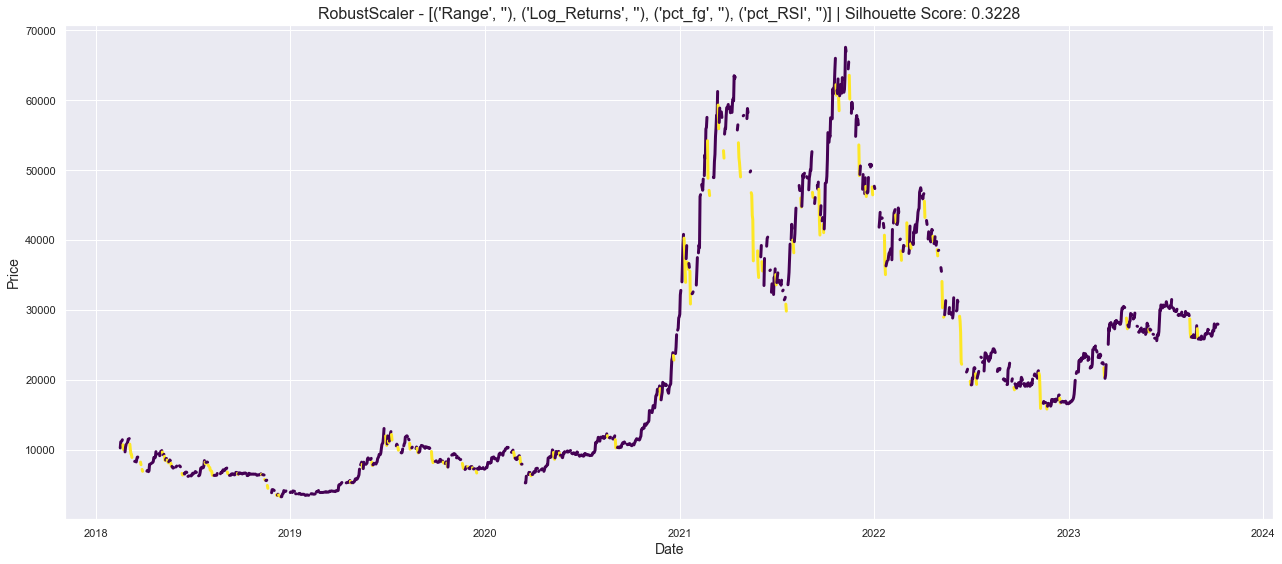

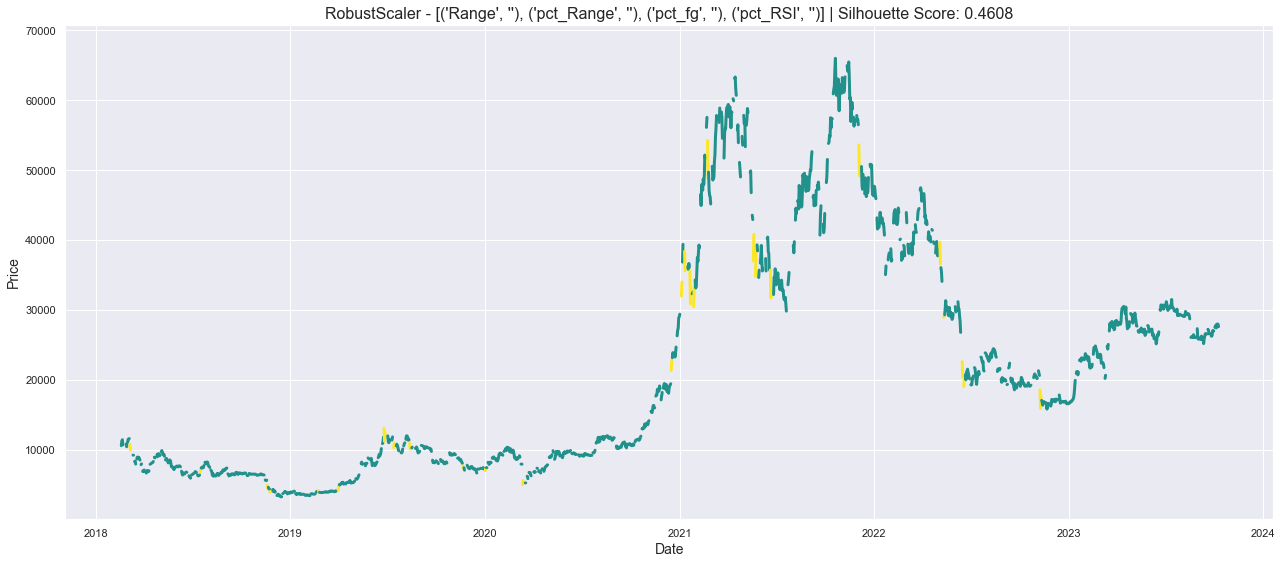

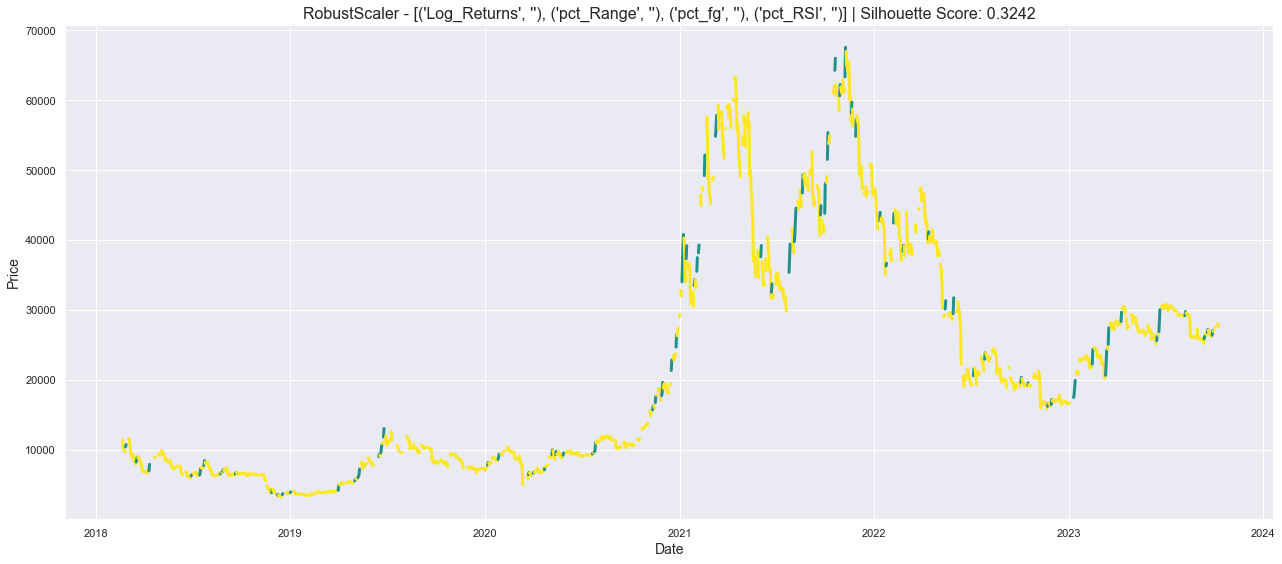

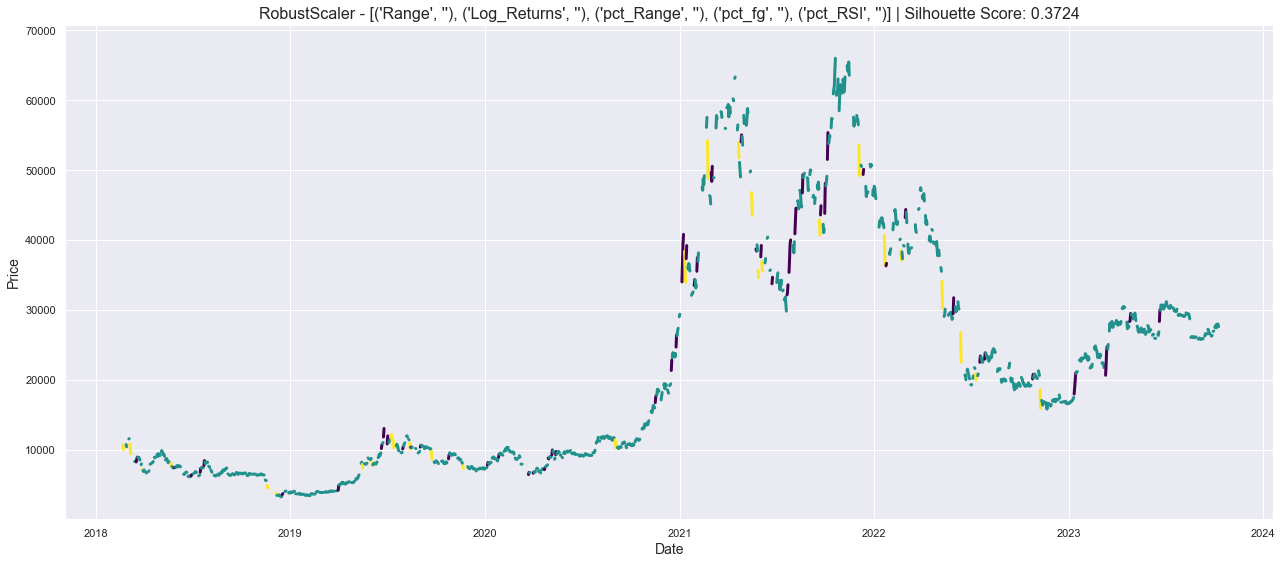

In [26]:
def plot_robust_range_models(results, X_train_2, train_price):
    """
    For all k-means models in 'results' whose keys include both 'RobustScaler' and 'Range',
    plot the train_price time series as a continuous colored line where the color reflects 
    the cluster label over time.
    
    Parameters:
      results (dict): Dictionary with keys like "RobustScaler - (feature1, feature2, ...)"
                      and values containing at least 'labels', 'silhouette_score', etc.
      X_train_2 (pd.DataFrame): DataFrame used for clustering (with a datetime index).
      train_price (pd.Series or pd.DataFrame): Price data with the same date index as X_train_2.
      
    Returns:
      None (Displays plots)
    """
    # Filter for keys containing both "RobustScaler" and "Range"
    filtered_results = {k: v for k, v in results.items() if "RobustScaler" in k and "Range" in k}
    
    if not filtered_results:
        print("No models found with 'RobustScaler' and 'Range' in their key.")
        return
    
    # Iterate over the filtered models
    for key, model_data in filtered_results.items():
        # Expecting the key format "RobustScaler - (feature1, feature2, ...)"
        try:
            scaler_name, features_str = key.split(" - ", 1)
            selected_features = eval(features_str)  # Convert string to tuple/list
            if isinstance(selected_features, str):
                selected_features = [selected_features]
        except Exception as e:
            print(f"Error parsing key '{key}': {e}")
            continue

        # Extract the subset of X_train_2 for these features and drop missing values
        df_subset = X_train_2[list(selected_features)].dropna()
        indices = df_subset.index
        
        # Retrieve the cluster labels (assumed to be aligned with df_subset)
        labels = model_data["labels"]
        if len(labels) != len(df_subset):
            print(f"Warning: For key {key}, number of labels ({len(labels)}) doesn't match subset length ({len(df_subset)}). Skipping.")
            continue
        
        # Align train_price with the subset indices
        price_subset = train_price.loc[indices]
        
        # Prepare a colormap based on the unique cluster labels
        unique_labels = np.unique(labels)
        n_labels = len(unique_labels)
        cmap = cm.get_cmap('viridis', n_labels)
        label2color = {label: cmap(i) for i, label in enumerate(unique_labels)}
        
        # Convert the index and price values to arrays for plotting
        dates = np.array(price_subset.index)
        prices = np.array(price_subset.values).flatten()
        
        # Group contiguous segments that share the same cluster label
        segments = []
        seg_start = 0
        for i in range(1, len(labels)):
            if labels[i] != labels[i-1]:
                segments.append((seg_start, i-1, labels[i-1]))
                seg_start = i
        segments.append((seg_start, len(labels)-1, labels[-1]))
        
        # Create a larger figure for clarity
        plt.figure(figsize=(18, 8))
        for start, end, cluster in segments:
            plt.plot(dates[start:end+1], prices[start:end+1],
                     color=label2color[cluster], linewidth=3,
                     label=f"Cluster {cluster}" if start == seg_start else "")
        
        plt.title(f"{key} | Silhouette Score: {model_data['silhouette_score']:.4f}", fontsize=16)
        plt.xlabel("Date", fontsize=14)
        plt.ylabel("Price", fontsize=14)
        plt.grid(True)
        plt.tight_layout()
        plt.show()

plot_robust_range_models(results, X_train_2, train_price)

* RobustScaler Range, Log Returns, pct_Range, pct_fg, pct_RSI. Seem to track well the bull spikes with purple color and the bear spikes with yellow color.
* Range, Log returns, pct_range, pct_RSI. Same movement but with a higher silhouette score.
* Log returns, pct_RSI, pct_range. Same movement but with a higher silhouette score.
* Range, Log returns, pct_RSI
* Log returns, pct_range
* Range, pct_RSI
* Range, log_returns
* Combine Range, range_pct (or) Range, pct_fg with other metric. The pro of these mertics is that the capture high volatility but the con is that this volatility exist for both, a bull signal and a bear signal. Therefore we could combine this metric with another one.